<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Standard-alpha-div" data-toc-modified-id="Standard-alpha-div-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Standard alpha div</a></span></li><li><span><a href="#EcoPhy" data-toc-modified-id="EcoPhy-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>EcoPhy</a></span></li><li><span><a href="#FD" data-toc-modified-id="FD-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>FD</a></span></li></ul></li></ul></li><li><span><a href="#Format" data-toc-modified-id="Format-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Format</a></span></li><li><span><a href="#Age-dynamics" data-toc-modified-id="Age-dynamics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Age dynamics</a></span></li><li><span><a href="#Westernization" data-toc-modified-id="Westernization-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Westernization</a></span></li><li><span><a href="#Disease" data-toc-modified-id="Disease-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Disease</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* secondary analyses of alpha diversity to help with data interpretation

# Var

In [191]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/'

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt2.qs'

# metadata
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_ff.tsv')

# alpha div
## standard
alpha_div_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/alpha_div_cog-pfam.tsv'
## ecophy
mntd_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/MNTD.tsv'
mpd_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/MPD.tsv'
## FD
fd_traitar_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/Traitar_FD_m-min.RDS'
fd_cogcat_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/cogcat_FD_m-min.RDS'

# params
threads = 8

# Init

In [192]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [193]:
df.dims()
setDTthreads(threads)
make_dir(work_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/ 


# Load

In [194]:
# sample metadata
meta = Fread(metadata_file) %>%
    select.(Sample, dataset_name, subjectID, study_condition, 
            age, gender, BMI, country, disease, westernized)
meta %>% unique_n('Samples', Sample)
meta %>% unique_n('Subjects', subjectID)
meta %>% unique_n('Datasets', dataset_name)
meta

No. of unique Samples: 2943 
No. of unique Subjects: 2943 
No. of unique Datasets: 30 


Sample,dataset_name,subjectID,study_condition,age,gender,BMI,country,disease,westernized
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<lgl>
TRAVELRES1,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,25,female,NA,SWE,healthy,TRUE
TRAVELRES11,Bengtsson-PalmeJ_2015,TRAVELRES11_12,control,22,female,NA,SWE,healthy,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_45,ZeeviD_2015,PNP_Validation_45,control,NA,,NA,ISR,healthy,TRUE
PNP_Validation_46,ZeeviD_2015,PNP_Validation_46,control,NA,,NA,ISR,healthy,TRUE


### Standard alpha div

In [195]:
# alpha
alpha_div = Fread(alpha_div_file) %>%
    pivot_longer.(cols=c(-Sample), names_to='metric', values_to='value')
alpha_div

Sample,metric,value
<chr>,<chr>,<dbl>
A01_02_1FE,nobs,232
A02_01_1FE,nobs,176
⋮,⋮,⋮
nHMX11726,pd_pfamcat,25.03576
scavenger.11.60.0,pd_pfamcat,18.25607


### EcoPhy

In [196]:
# MNTD
mntd_div = Fread(mntd_file) %>%
    rename.('value' = MNTD,
            'metric' = tree) %>%
    mutate.(metric = gsub('^', 'MNTD_', metric))
mntd_div

Sample,value,metric
<chr>,<dbl>,<chr>
A01_02_1FE,-1.1705415,MNTD_gtdb_phy
A02_01_1FE,0.8646422,MNTD_gtdb_phy
⋮,⋮,⋮
nHMX11726,-3.112471,MNTD_phy_pfamcat
scavenger.11.60.0,-3.871724,MNTD_phy_pfamcat


In [197]:
# MPD
mpd_div = Fread(mpd_file) %>%
    rename.('value' = MPD,
            'metric' = tree) %>%
    mutate.(metric = gsub('^', 'MPD_', metric))
mpd_div

Sample,value,metric
<chr>,<dbl>,<chr>
A01_02_1FE,0.3816402,MPD_gtdb_phy
A02_01_1FE,4.4678617,MPD_gtdb_phy
⋮,⋮,⋮
nHMX11726,-3.76430,MPD_phy_pfamcat
scavenger.11.60.0,-13.87622,MPD_phy_pfamcat


### FD

In [198]:
FD_res = readRDS(fd_traitar_file)
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
fd_traitar = v %>%
    lapply(function(x) FD_res[[x]] %>% as.data.frame) %>%
    do.call(cbind, .)
colnames(fd_traitar) = v
fd_traitar$Sample = rownames(fd_traitar)
fd_traitar

,FRic,FEve,FDiv,FDis,RaoQ,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A01_02_1FE,1281.648,0.6305736,0.7250427,6.970392,52.69103,A01_02_1FE
A02_01_1FE,860.518,0.5762672,0.8080909,6.338391,45.45341,A02_01_1FE
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,581.4522,0.5773349,0.8226567,5.954451,37.63154,nHMX11726
scavenger.11.60.0,158.4517,0.5402863,0.5368664,5.515205,31.73553,scavenger.11.60.0


In [199]:
# formatting
fd_traitar = fd_traitar %>%
    pivot_longer.(cols=c(-Sample), names_to='metric', values_to='value') %>%
    mutate.(metric = gsub('^', 'trait_', metric))
fd_traitar

Sample,metric,value
<chr>,<chr>,<dbl>
A01_02_1FE,trait_FRic,1281.648
A02_01_1FE,trait_FRic,860.518
⋮,⋮,⋮
nHMX11726,trait_RaoQ,37.63154
scavenger.11.60.0,trait_RaoQ,31.73553


In [200]:
FD_res = readRDS(fd_cogcat_file)
v = c('FRic', 'FEve', 'FDiv', 'FDis', 'RaoQ') 
fd_cogcat = v %>%
    lapply(function(x) FD_res[[x]] %>% as.data.frame) %>%
    do.call(cbind, .)
colnames(fd_cogcat) = v
fd_cogcat$Sample = rownames(fd_cogcat)
fd_cogcat

,FRic,FEve,FDiv,FDis,RaoQ,Sample
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A01_02_1FE,0.001963384,0.6300577,0.8344220,0.1390624,0.02458852,A01_02_1FE
A02_01_1FE,0.001858941,0.6244829,0.8111916,0.1164369,0.01988324,A02_01_1FE
⋮,⋮,⋮,⋮,⋮,⋮,⋮
nHMX11726,0.0012117563,0.6201434,0.6032538,0.06340579,0.005202252,nHMX11726
scavenger.11.60.0,0.0009740577,0.5382320,0.6360507,0.07027430,0.005815837,scavenger.11.60.0


In [201]:
# formatting
fd_cogcat = fd_cogcat %>%
    pivot_longer.(cols=c(-Sample), names_to='metric', values_to='value') %>%
    mutate.(metric = gsub('^', 'cogcat_', metric))
fd_cogcat

Sample,metric,value
<chr>,<chr>,<dbl>
A01_02_1FE,cogcat_FRic,0.001963384
A02_01_1FE,cogcat_FRic,0.001858941
⋮,⋮,⋮
nHMX11726,cogcat_RaoQ,0.005202252
scavenger.11.60.0,cogcat_RaoQ,0.005815837


# Format

In [202]:
alpha_all = rbindlist(list(
    alpha_div,
    mntd_div,
    mpd_div,
    fd_traitar,
    fd_cogcat
    ), use.names=TRUE)
alpha_all$metric %>% table
alpha_all 

.
     cogcat_FDis      cogcat_FDiv      cogcat_FEve      cogcat_FRic 
            2943             2943             2943             2943 
     cogcat_RaoQ    MNTD_gtdb_phy     MNTD_phy_cog  MNTD_phy_cogcat 
            2943             2943             2943             2943 
   MNTD_phy_pfam MNTD_phy_pfamcat     MNTD_trt_phy     MPD_gtdb_phy 
            2943             2943             2943             2943 
     MPD_phy_cog   MPD_phy_cogcat     MPD_phy_pfam  MPD_phy_pfamcat 
            2943             2943             2943             2943 
     MPD_trt_phy             nobs           pd_cog        pd_cogcat 
            2943             2943             2943             2943 
         pd_pfam       pd_pfamcat           pd_phy           pd_trt 
            2943             2943             2943             2943 
          pielou          shannon          simpson       trait_FDis 
            2943             2943             2943             2943 
      trait_FDiv       trait_FEv

Sample,metric,value
<chr>,<chr>,<dbl>
A01_02_1FE,nobs,232
A02_01_1FE,nobs,176
⋮,⋮,⋮
nHMX11726,cogcat_RaoQ,0.005202252
scavenger.11.60.0,cogcat_RaoQ,0.005815837


# Age dynamics

In [203]:
alpha_all_j = alpha_all %>%
    inner_join.(meta %>% 
                    filter.(age != ''),
                c('Sample')) %>%
    mutate.(age = age %>% as.Num)
alpha_all_j$Sample %>% unique_n('Samples')
summary_x(alpha_all_j$age)
alpha_all_j

No. of unique Samples: 1742 


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
age,19,25,43,44.49426,62,107,31.807,12.985


Sample,metric,value,dataset_name,subjectID,study_condition,age,gender,BMI,country,disease,westernized
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>
TRAVELRES1,nobs,324.000000,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,25,female,NA,SWE,healthy,TRUE
TRAVELRES1,shannon,4.353803,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,25,female,NA,SWE,healthy,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YEZ_N.37,cogcat_FDis,0.053174250,YeZ_2018,YEZ_N-37,control,46,male,29.7,CHN,healthy,TRUE
YEZ_N.37,cogcat_RaoQ,0.003298974,YeZ_2018,YEZ_N-37,control,46,male,29.7,CHN,healthy,TRUE


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”


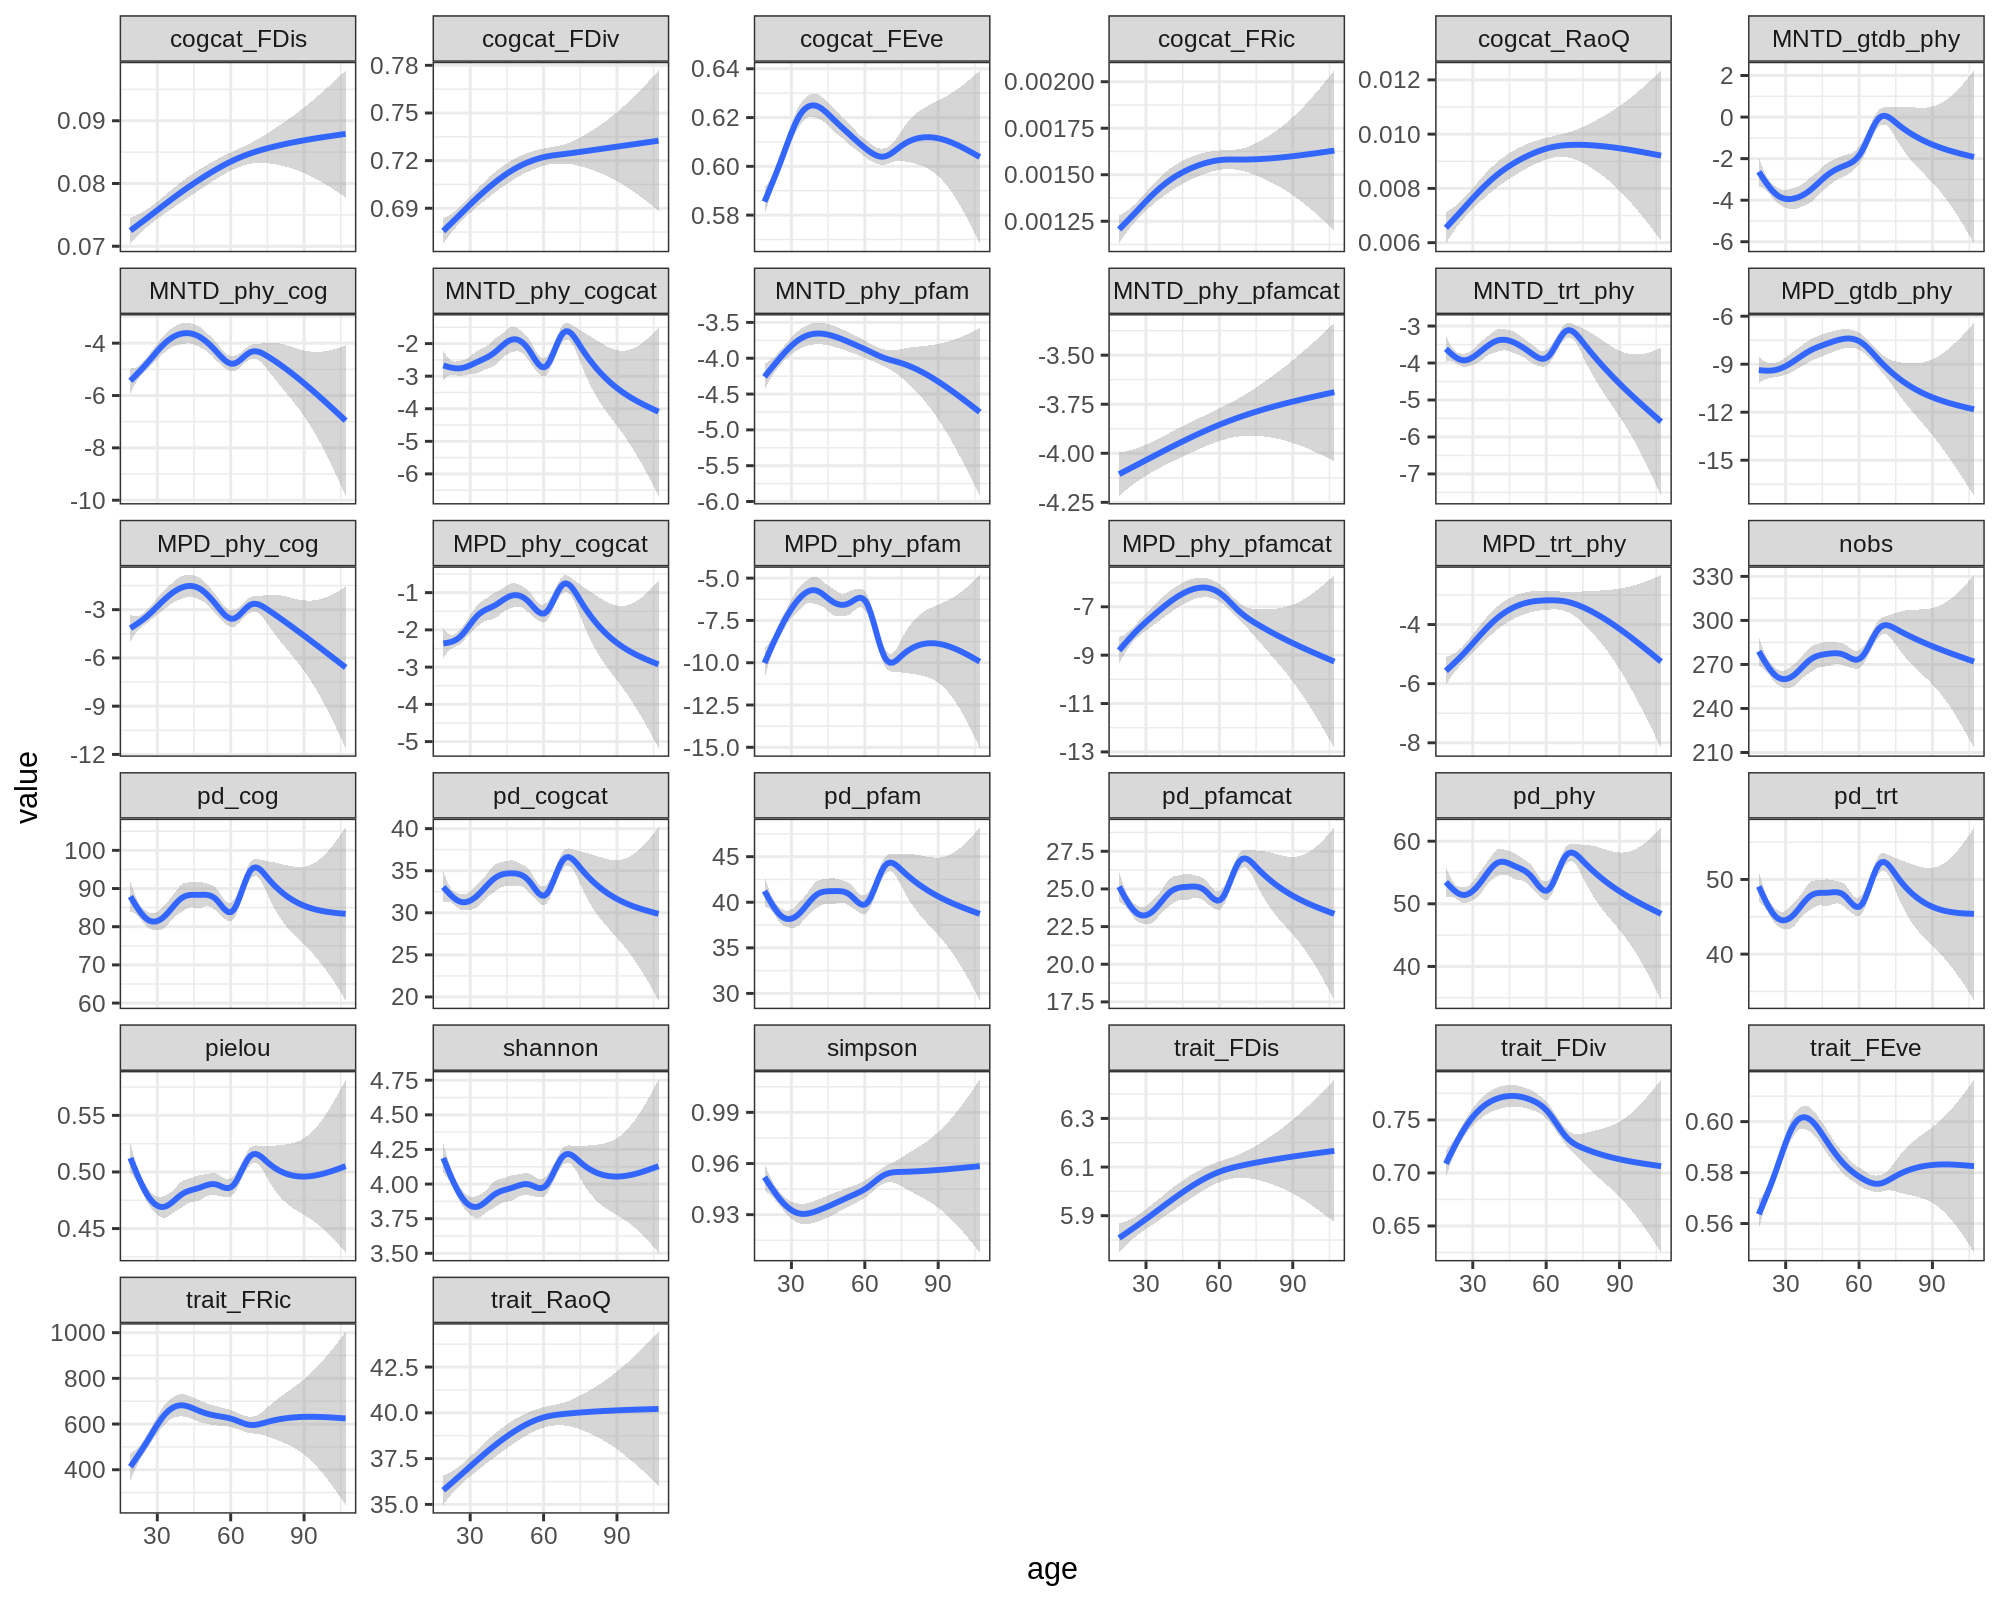

In [204]:
# plotting
p = alpha_all_j %>%
    ggplot(aes(age, value)) +
    geom_smooth() +
    #geom_point(size=0.7, alpha=0.6) +
    facet_wrap(~ metric, scales='free_y') +
    theme_bw()
p.dims(10,8)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



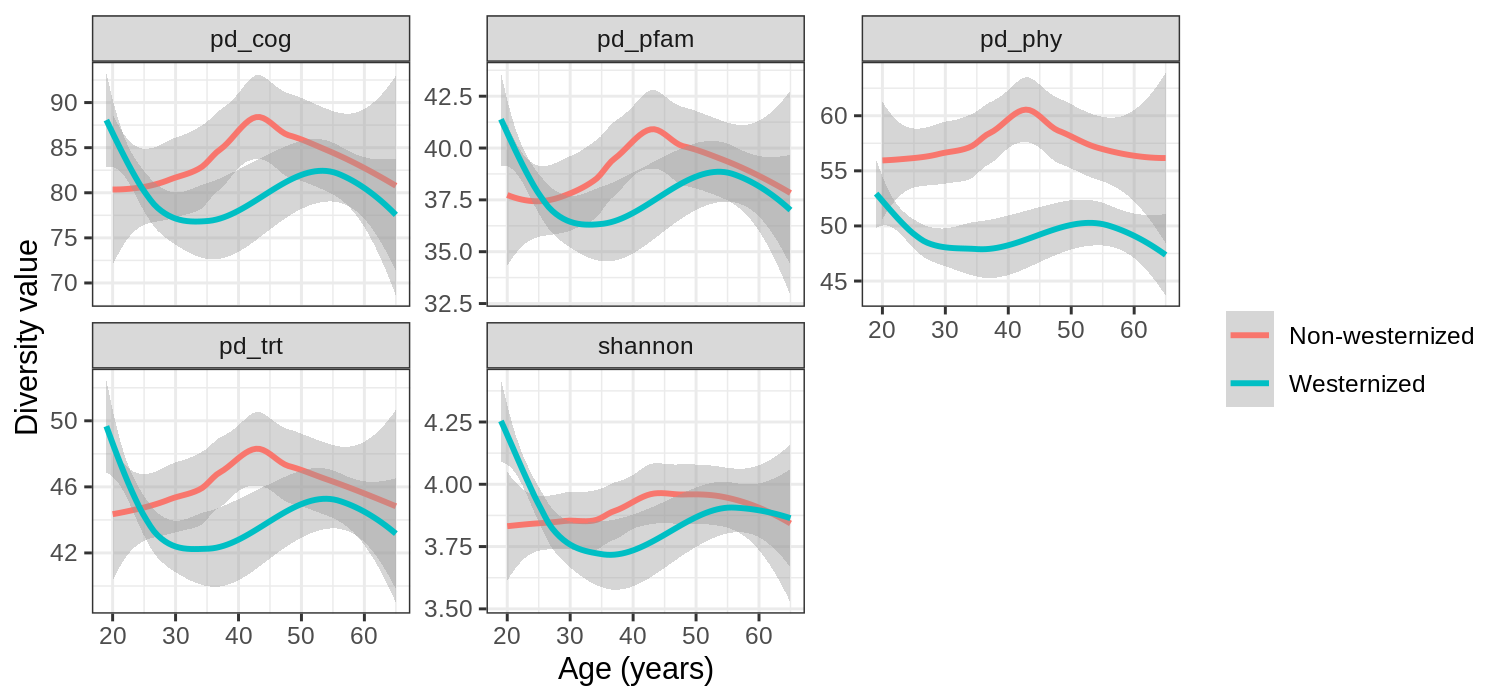

In [205]:
# plotting FD
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    filter.(gender != '',
            age <= 65) %>%
    #mutate.(value = scales::rescale(value),
    #        .by=c(metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('(pd|shannon)', metric)) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 'Westernized', 'Non-westernized')) %>%
    ggplot(aes(age, value, color=westernized)) +
    geom_smooth() +
    scale_color_discrete('') +
    labs(x='Age (years)', y='Diversity value') +
    facet_wrap(~ metric, scales='free_y') +
    theme_bw()
p.dims(7.5,3.5)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



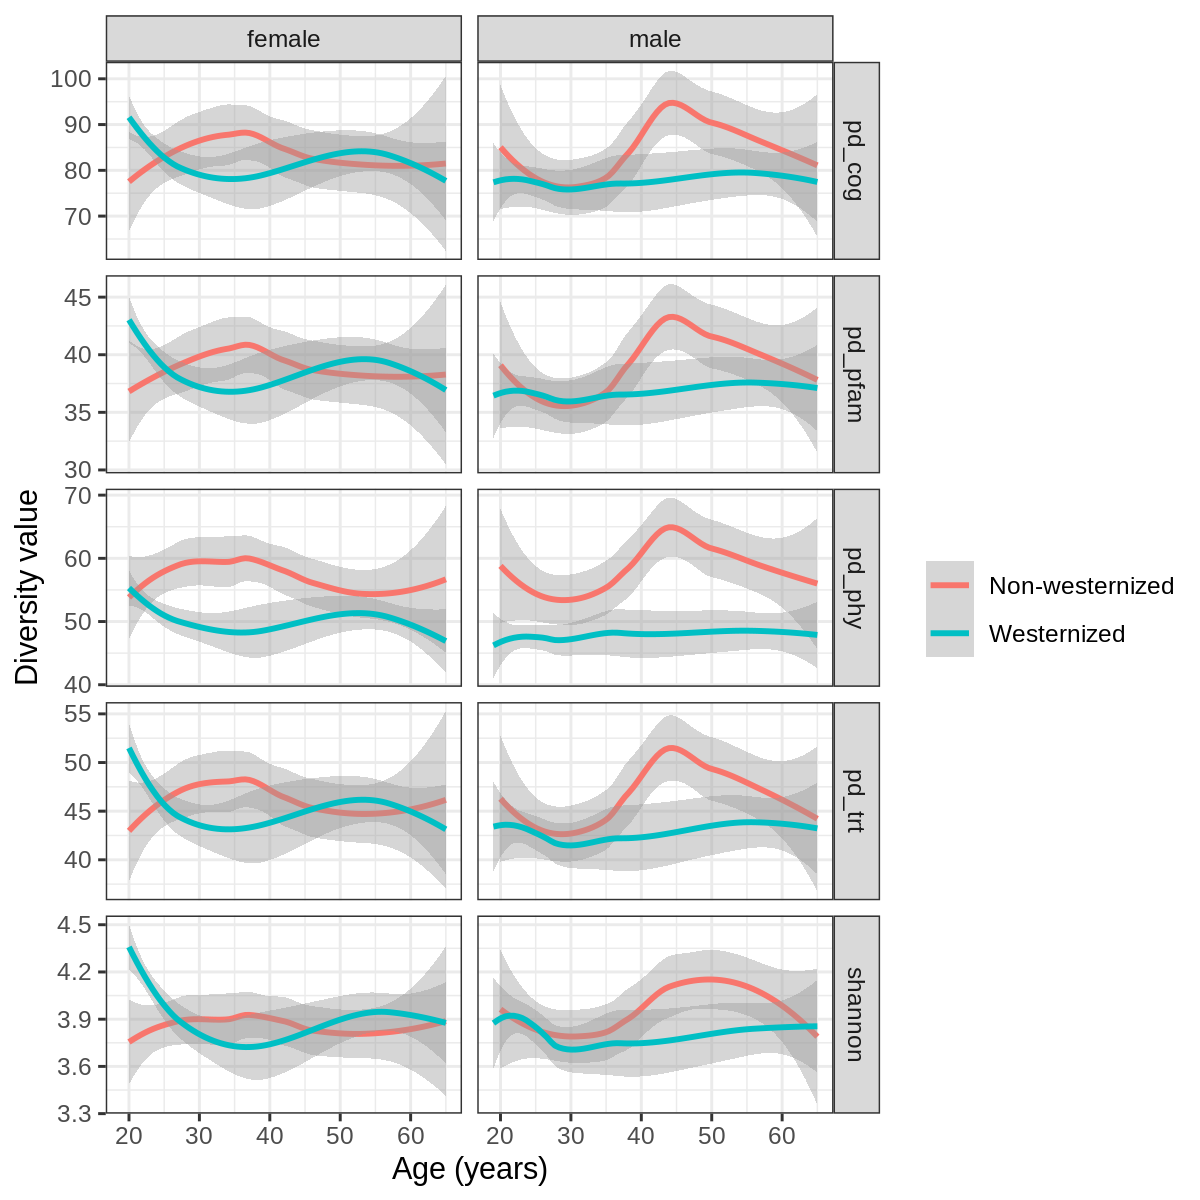

In [206]:
# plotting FD
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    filter.(gender != '',
            age <= 65) %>%
    #mutate.(value = scales::rescale(value),
    #        .by=c(metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('(pd|shannon)', metric)) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 
                                 'Westernized', 
                                 'Non-westernized')) %>%
    ggplot(aes(age, value, color=westernized)) +
    geom_smooth() +
    scale_color_discrete('') +
    labs(x='Age (years)', y='Diversity value') +
    facet_grid(metric ~ gender, scales='free_y') +
    theme_bw()
p.dims(6,6)
plot(p)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



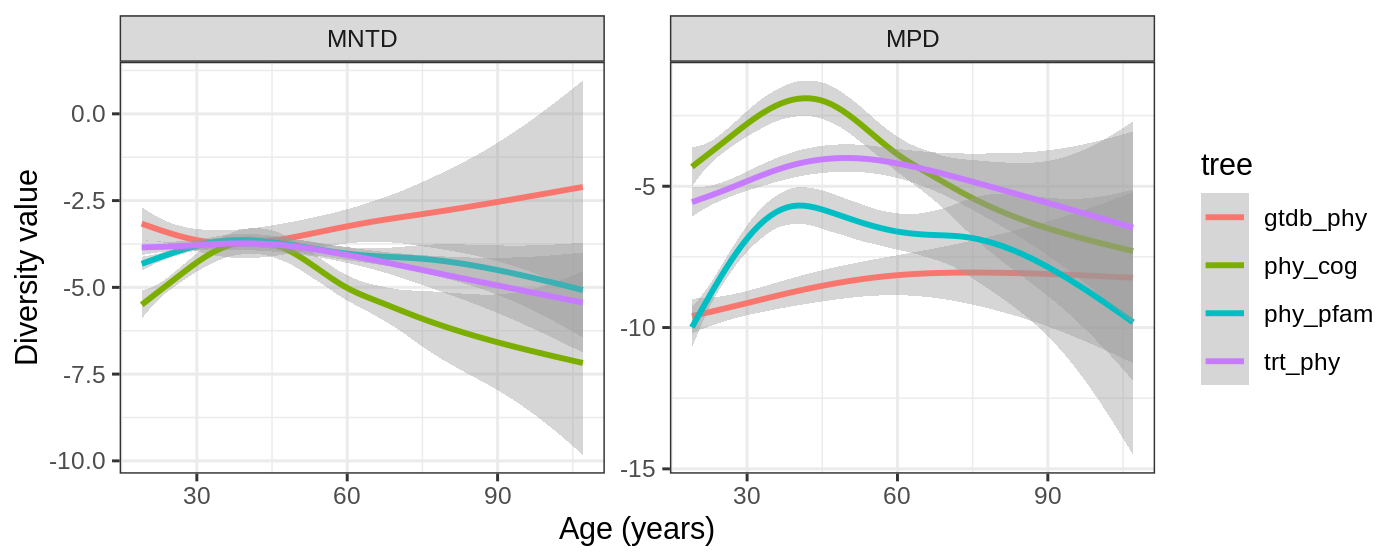

In [207]:
# plotting MPD/MNTD
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('MPD|MNTD', metric)) %>%
    ggplot(aes(age, value, color=tree)) +
    geom_smooth() +
    labs(x='Age (years)',
         y='Diversity value') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw()
p.dims(7,2.8)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



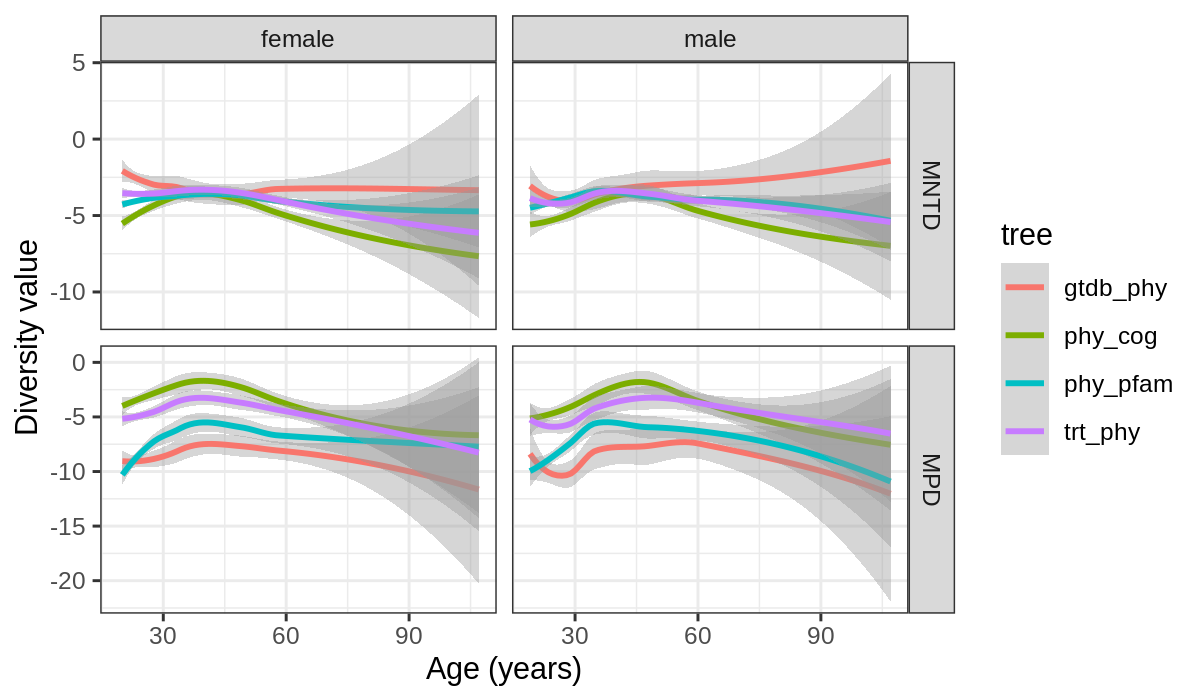

In [226]:
# plotting MPD/MNTD
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    filter.(gender != '') %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('MPD|MNTD', metric)) %>%
    ggplot(aes(age, value, color=tree)) +
    geom_smooth() +
    labs(x='Age (years)',
         y='Diversity value') +
    facet_grid(measure ~ gender, scales='free_y') +
    theme_bw()
p.dims(6,3.5)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



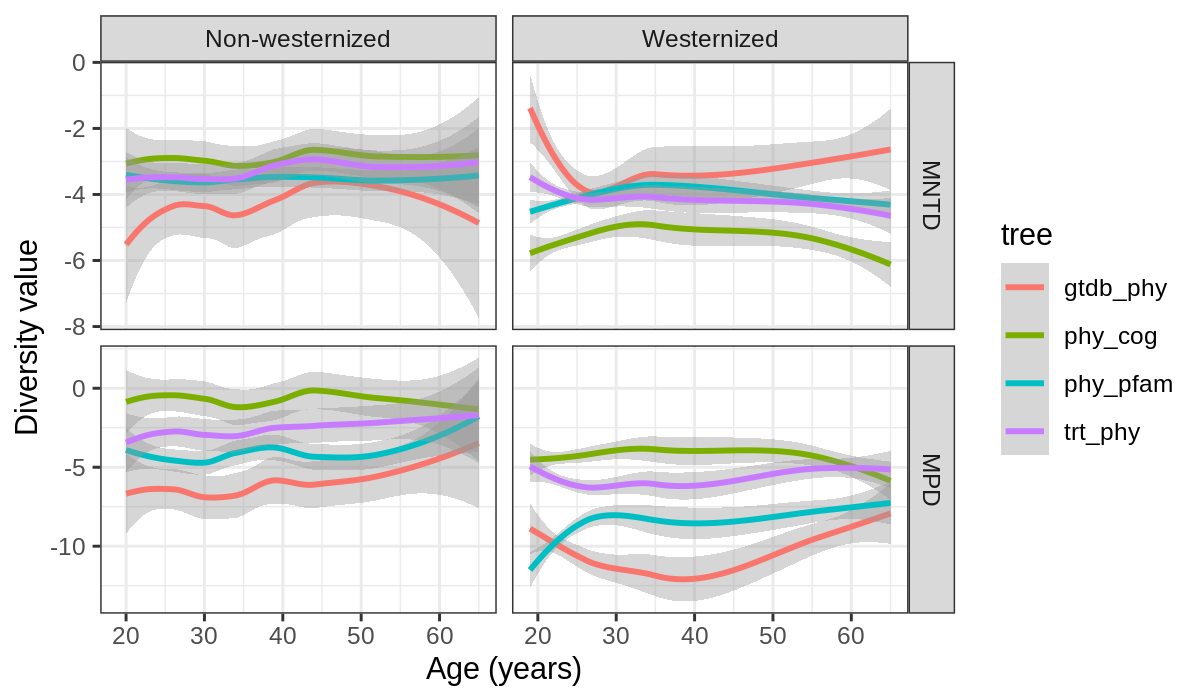

In [171]:
# plotting MPD/MNTD
p = alpha_all_j %>%
    filter.(disease == 'healthy',
            age <= 65) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('MPD|MNTD', metric)) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 'Westernized', 'Non-westernized')) %>%
    ggplot(aes(age, value, color=tree)) +
    geom_smooth() +
    labs(x='Age (years)',
         y='Diversity value') +
    facet_grid(measure ~ westernized, scales='free_y') +
    theme_bw()
p.dims(6,3.5)
plot(p)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



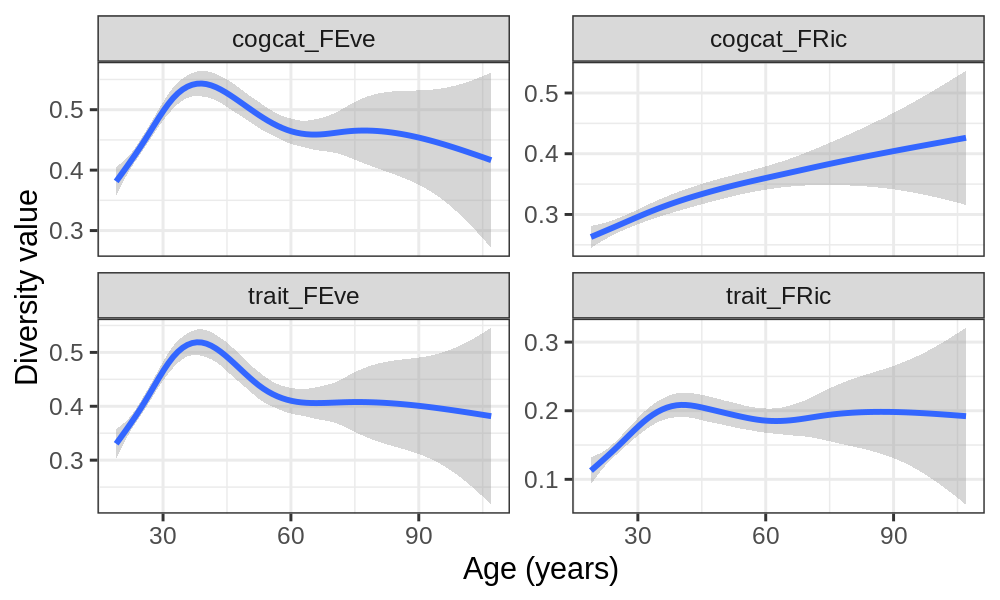

In [172]:
# plotting FD
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('_(FEve|FRic)', metric)) %>%
    ggplot(aes(age, value)) +
    geom_smooth() +
    labs(x='Age (years)', y='Diversity value') +
    facet_wrap(~ metric, scales='free_y') +
    theme_bw()
p.dims(5,3)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



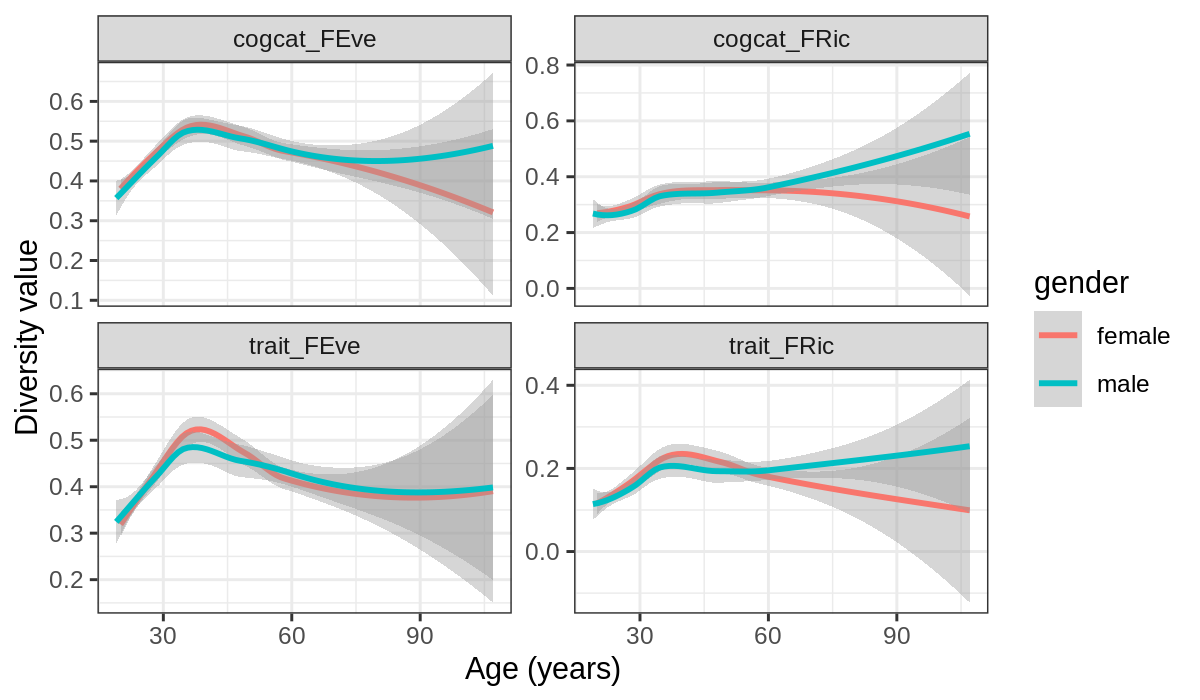

In [174]:
# plotting FD
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    filter.(gender != '') %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('_(FEve|FRic)', metric)) %>%
    ggplot(aes(age, value, color=gender)) +
    geom_smooth() +
    labs(x='Age (years)', y='Diversity value') +
    facet_wrap(~ metric, scales='free_y') +
    theme_bw()
p.dims(6,3.5)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



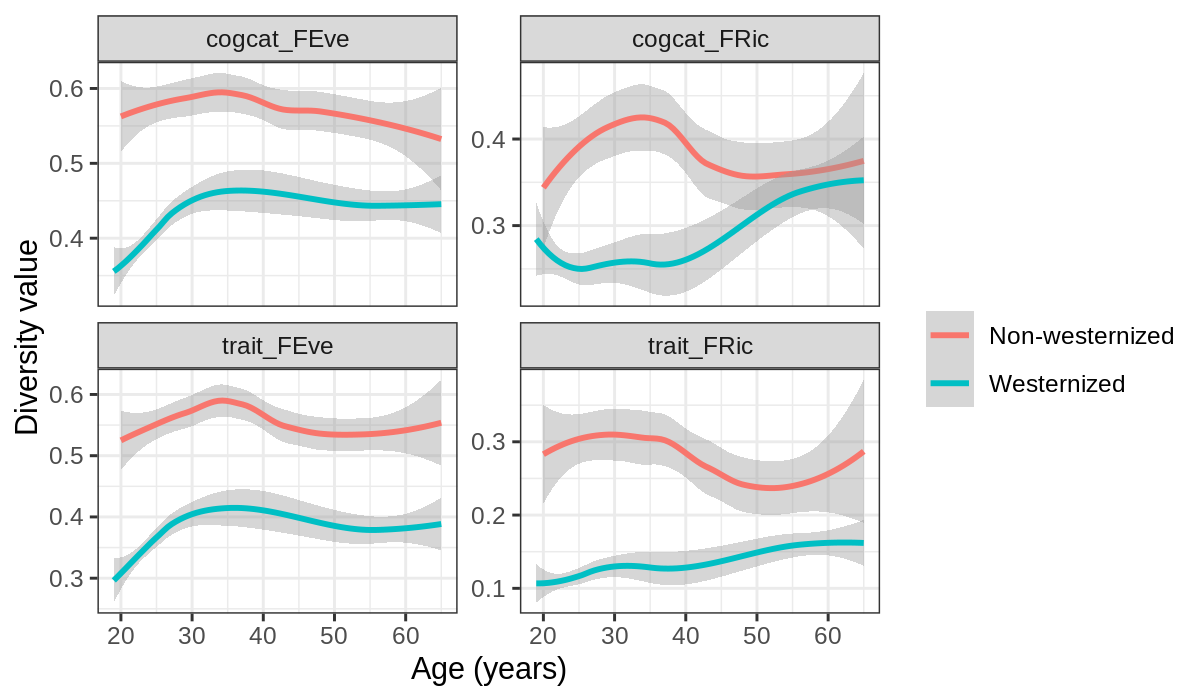

In [179]:
# plotting FD
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    filter.(gender != '',
            age <= 65) %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(!grepl('cat$', metric)) %>%
    filter.(grepl('_(FEve|FRic)', metric)) %>%
    mutate.(westernized = ifelse(westernized == TRUE, 'Westernized', 'Non-westernized')) %>%
    ggplot(aes(age, value, color=westernized)) +
    geom_smooth() +
    scale_color_discrete('') +
    labs(x='Age (years)', y='Diversity value') +
    facet_wrap(~ metric, scales='free_y') +
    theme_bw()
p.dims(6,3.5)
plot(p)

# Westernization

In [115]:
# formatting
alpha_all_j = alpha_all %>%
    inner_join.(meta, c('Sample')) %>%
    mutate.(age = age %>% as.Num)
alpha_all_j$Sample %>% unique_n('Samples')
alpha_all_j

No. of unique Samples: 2943 


Sample,metric,value,dataset_name,subjectID,study_condition,age,gender,BMI,country,disease,westernized
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>
TRAVELRES1,nobs,324.000000,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,25,female,NA,SWE,healthy,TRUE
TRAVELRES1,shannon,4.353803,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,25,female,NA,SWE,healthy,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_46,cogcat_FDis,0.043124466,ZeeviD_2015,PNP_Validation_46,control,NA,,NA,ISR,healthy,TRUE
PNP_Validation_46,cogcat_RaoQ,0.002836495,ZeeviD_2015,PNP_Validation_46,control,NA,,NA,ISR,healthy,TRUE


Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


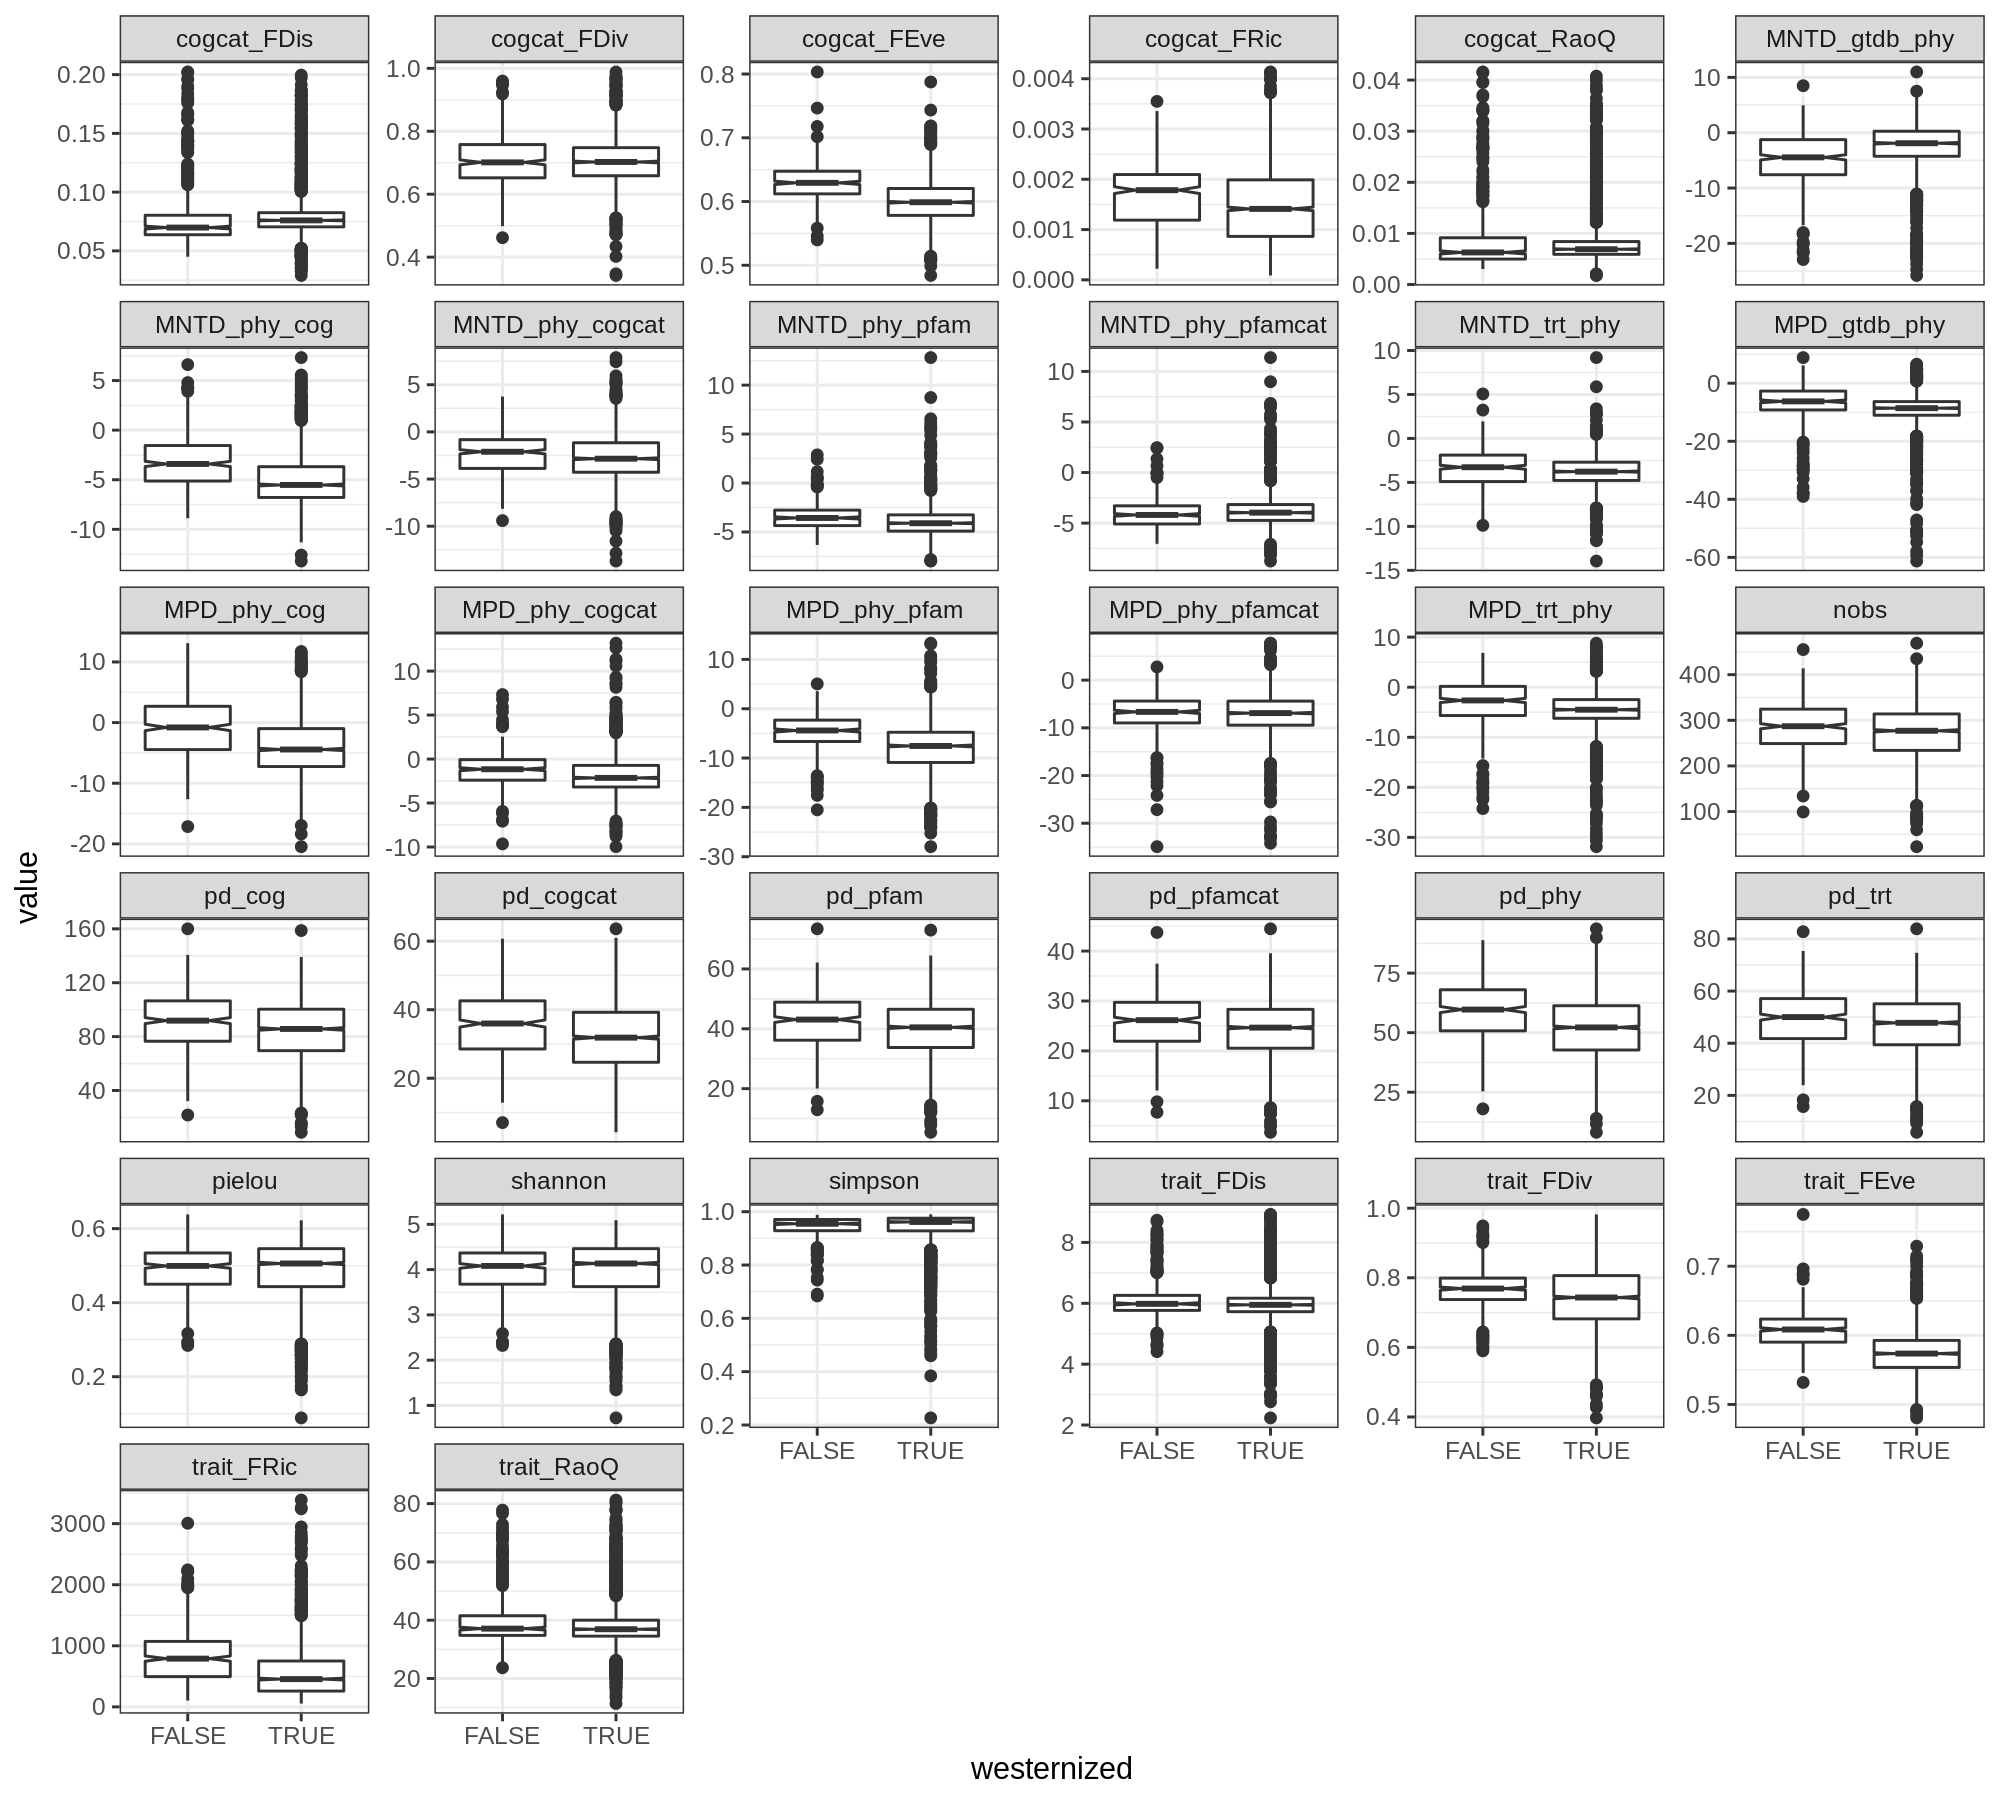

In [88]:
# plotting
p = alpha_all_j %>%
    ggplot(aes(westernized, value)) +
    geom_boxplot(notch=TRUE) +
    facet_wrap(~ metric, scales='free_y') +
    theme_bw()
p.dims(10,9)
plot(p)

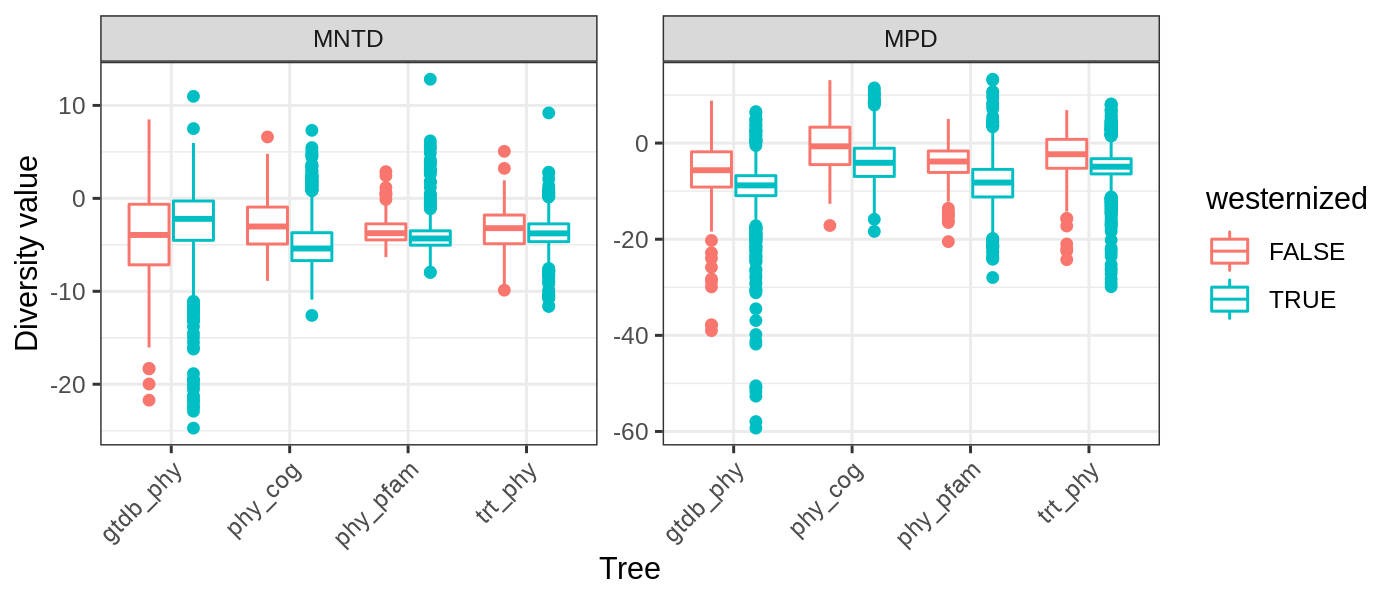

In [119]:
# plotting
p = alpha_all_j %>%
    filter.(disease == 'healthy') %>%
    filter.(! grepl('cat$', metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    filter.(grepl('^(MNTD|MPD)', metric)) %>%
    ggplot(aes(tree, value, color=westernized)) +
    geom_boxplot() +
    labs(x='Tree', y='Diversity value') +
    facet_wrap(~ measure, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(7,3)
plot(p)

# Disease

In [225]:
# # disease vs healthy as a fucntion of age
# meta_f = meta %>% 
#     filter.(disease != '',
#             age != '',
#             gender != '') %>%
#     semi_join.(alpha_all, c('Sample'))

# meta_f %>%
#     mutate.(disease = ifelse(disease == 'healthy', 'healthy', 'diseased')) %>%
#     mutate.(age_bin = case_when(age < 10 ~ '<10',
#                                age >= 10 & age < 20 ~ '>=10,<20',
#                                age >= 20 & age < 30 ~ '>=20,<30',
#                                age >= 30 & age < 40 ~ '>=30,<40',
#                                age >= 40 & age < 50 ~ '>=40,<50',
#                                age >= 50 & age < 60 ~ '>=50,<60',
#                                age >= 60 & age < 70 ~ '>=60,<70',
#                                age >= 70 & age < 80 ~ '>=70,<80',
#                                age >= 80 ~ '>=80')) %>%
#     mutate.(n_per_bin = n.(),
#             .by=c(age_bin, westernized, gender)) %>%
#     summarize.(perc = n.() / n_per_bin * 100,
#                .by=c(disease, westernized, age_bin, gender)) %>%
#     filter.(perc > 100)

In [120]:
# formatting
alpha_all_j = alpha_all %>%
    inner_join.(meta %>% filter.(disease != ''), 
                c('Sample')) %>%
    mutate.(age = age %>% as.Num)
alpha_all_j$Sample %>% unique_n('Samples')
alpha_all_j

No. of unique Samples: 2418 


Sample,metric,value,dataset_name,subjectID,study_condition,age,gender,BMI,country,disease,westernized
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<lgl>
TRAVELRES1,nobs,324.000000,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,25,female,NA,SWE,healthy,TRUE
TRAVELRES1,shannon,4.353803,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,25,female,NA,SWE,healthy,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PNP_Validation_46,cogcat_FDis,0.043124466,ZeeviD_2015,PNP_Validation_46,control,NA,,NA,ISR,healthy,TRUE
PNP_Validation_46,cogcat_RaoQ,0.002836495,ZeeviD_2015,PNP_Validation_46,control,NA,,NA,ISR,healthy,TRUE


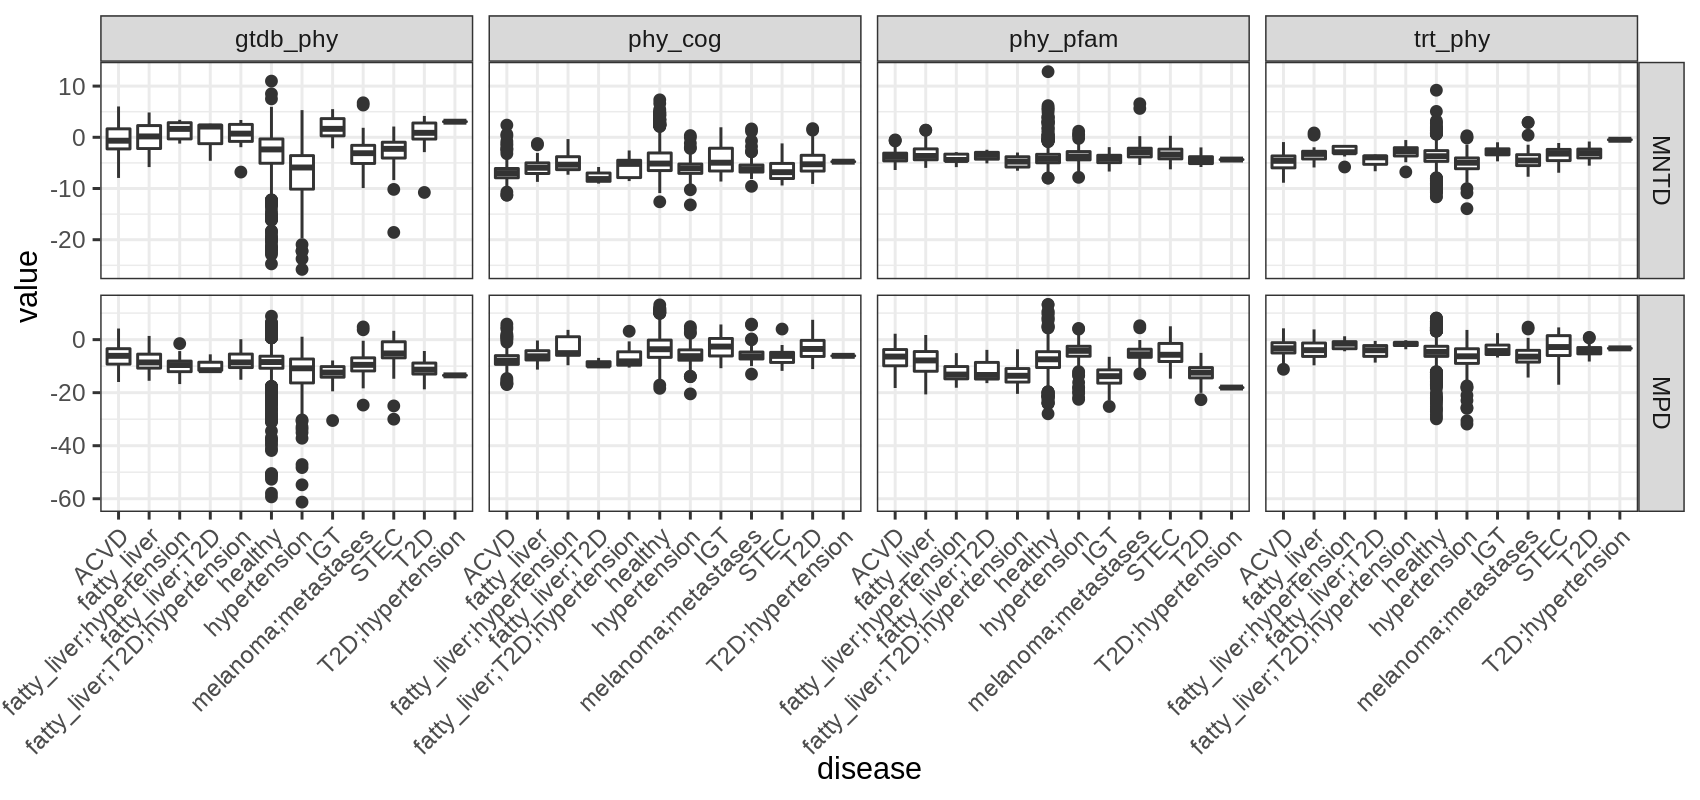

In [137]:
# plotting
p = alpha_all_j %>%
    filter.(grepl('(MPD|MNTD)', metric)) %>%
    filter.(! grepl('cat$', metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    ggplot(aes(disease, value)) +
    geom_boxplot() +
    facet_grid(measure ~ tree, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(8.5,4)
plot(p)

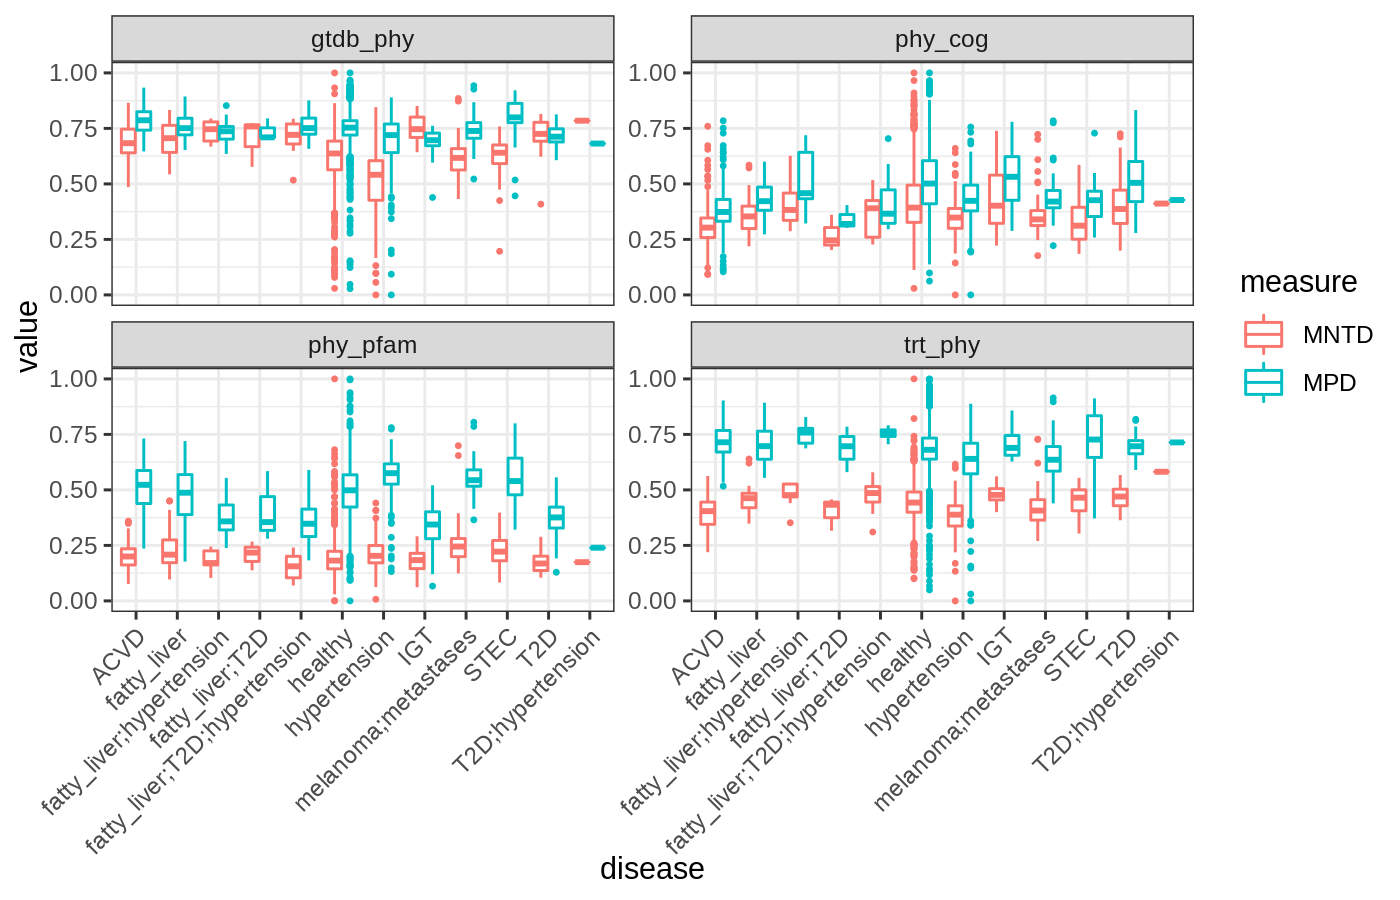

In [146]:
# plotting
p = alpha_all_j %>%
    filter.(grepl('(MPD|MNTD)', metric)) %>%
    filter.(! grepl('cat$', metric)) %>%
    mutate.(measure = gsub('_.+', '', metric),
            tree = gsub('^[^_]+_', '', metric)) %>%
    mutate.(value = scales::rescale(value),
            .by=c(tree, measure)) %>%
    ggplot(aes(disease, value, color=measure)) +
    geom_boxplot(outlier.size = 0.5) +
    facet_wrap( ~ tree, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(7,4.5)
plot(p)

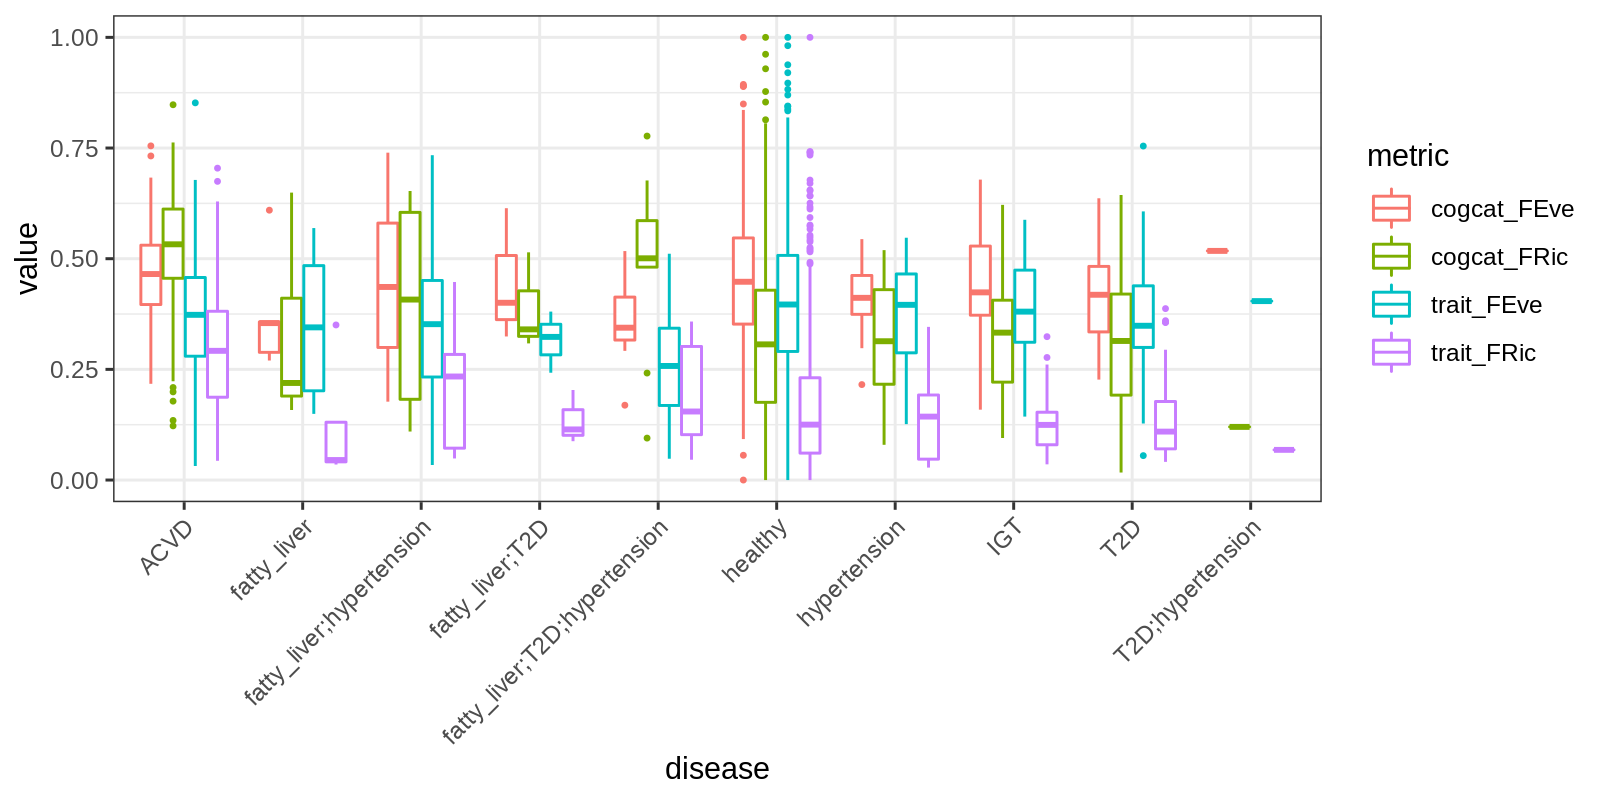

In [159]:
# plotting
p = alpha_all_j %>%
    filter.(gender != '', 
            age != '') %>%
    filter.(grepl('_(FEve|FRic)', metric)) %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    ggplot(aes(disease, value, color=metric)) +
    geom_boxplot(outlier.size=0.5) +
    #facet_wrap(~ metric, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(8,4)
plot(p)

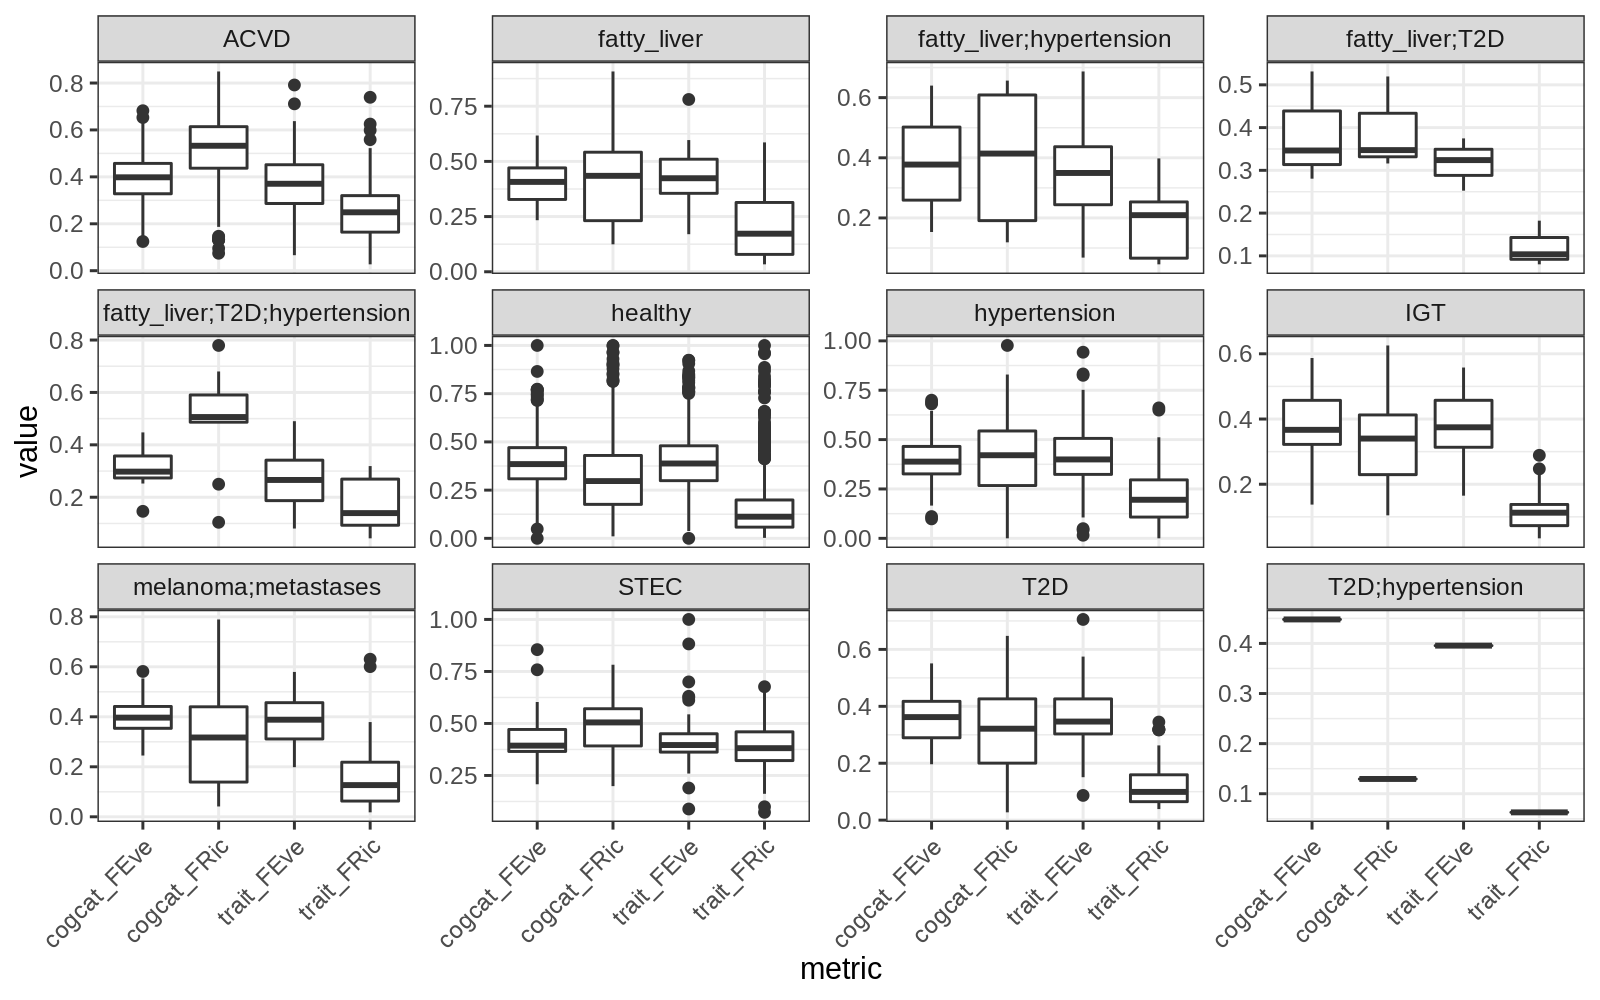

In [126]:
# plotting
p = alpha_all_j %>%
    filter.(grepl('_(FEve|FRic)', metric)) %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    ggplot(aes(metric, value)) +
    geom_boxplot() +
    facet_wrap(~ disease, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(8,5)
plot(p)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


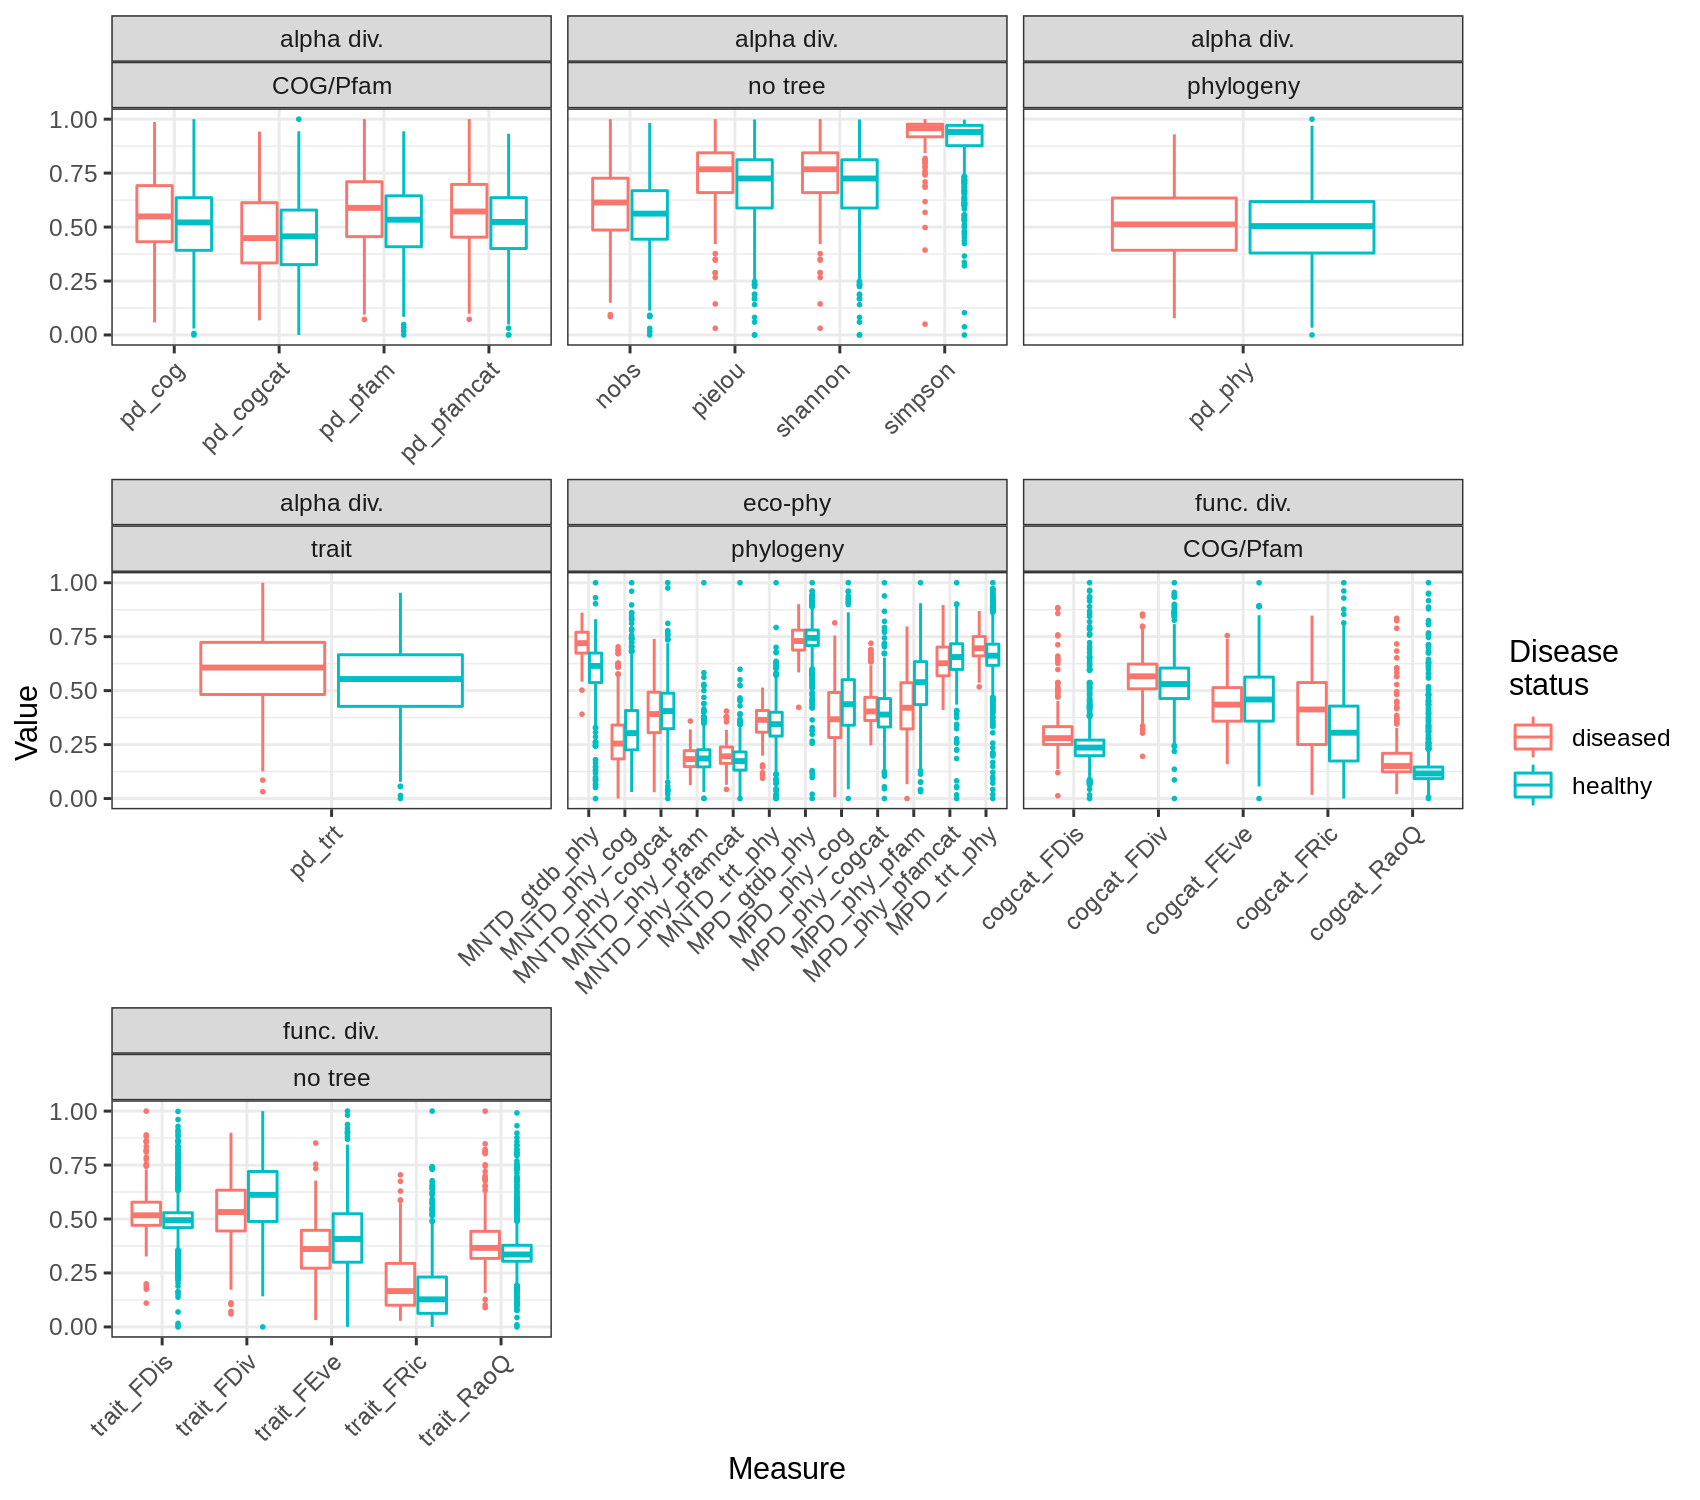

In [244]:
# plotting
p = alpha_all_j %>%
    filter.(disease != '') %>%
    mutate.(disease_status = ifelse(disease != 'healthy', 'diseased', 'healthy')) %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    mutate.(measure_type = case_when.(grepl('MPD|MNTD', metric) ~ 'eco-phy',
                                      grepl('FEve|FRic|FDis|RaoQ|FDiv', metric) ~ 'func. div.',
                                     TRUE ~ 'alpha div.')) %>%
    mutate.(data_type = case_when.(grepl('phy', metric) ~ 'phylogeny',
                                    grepl('trt', metric) ~ 'trait',
                                    grepl('pfam|cog', metric) ~ 'COG/Pfam',
                                    TRUE ~ 'no tree')) %>%
    ggplot(aes(metric, value, color=disease_status)) +
    geom_boxplot(outlier.size = 0.3) +
    theme_bw() +
    scale_color_discrete('Disease\nstatus') +
    labs(x='Measure', y='Value') +
    facet_wrap(measure_type ~ data_type, scales='free_x') +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(8.5,7.5)
plot(p)

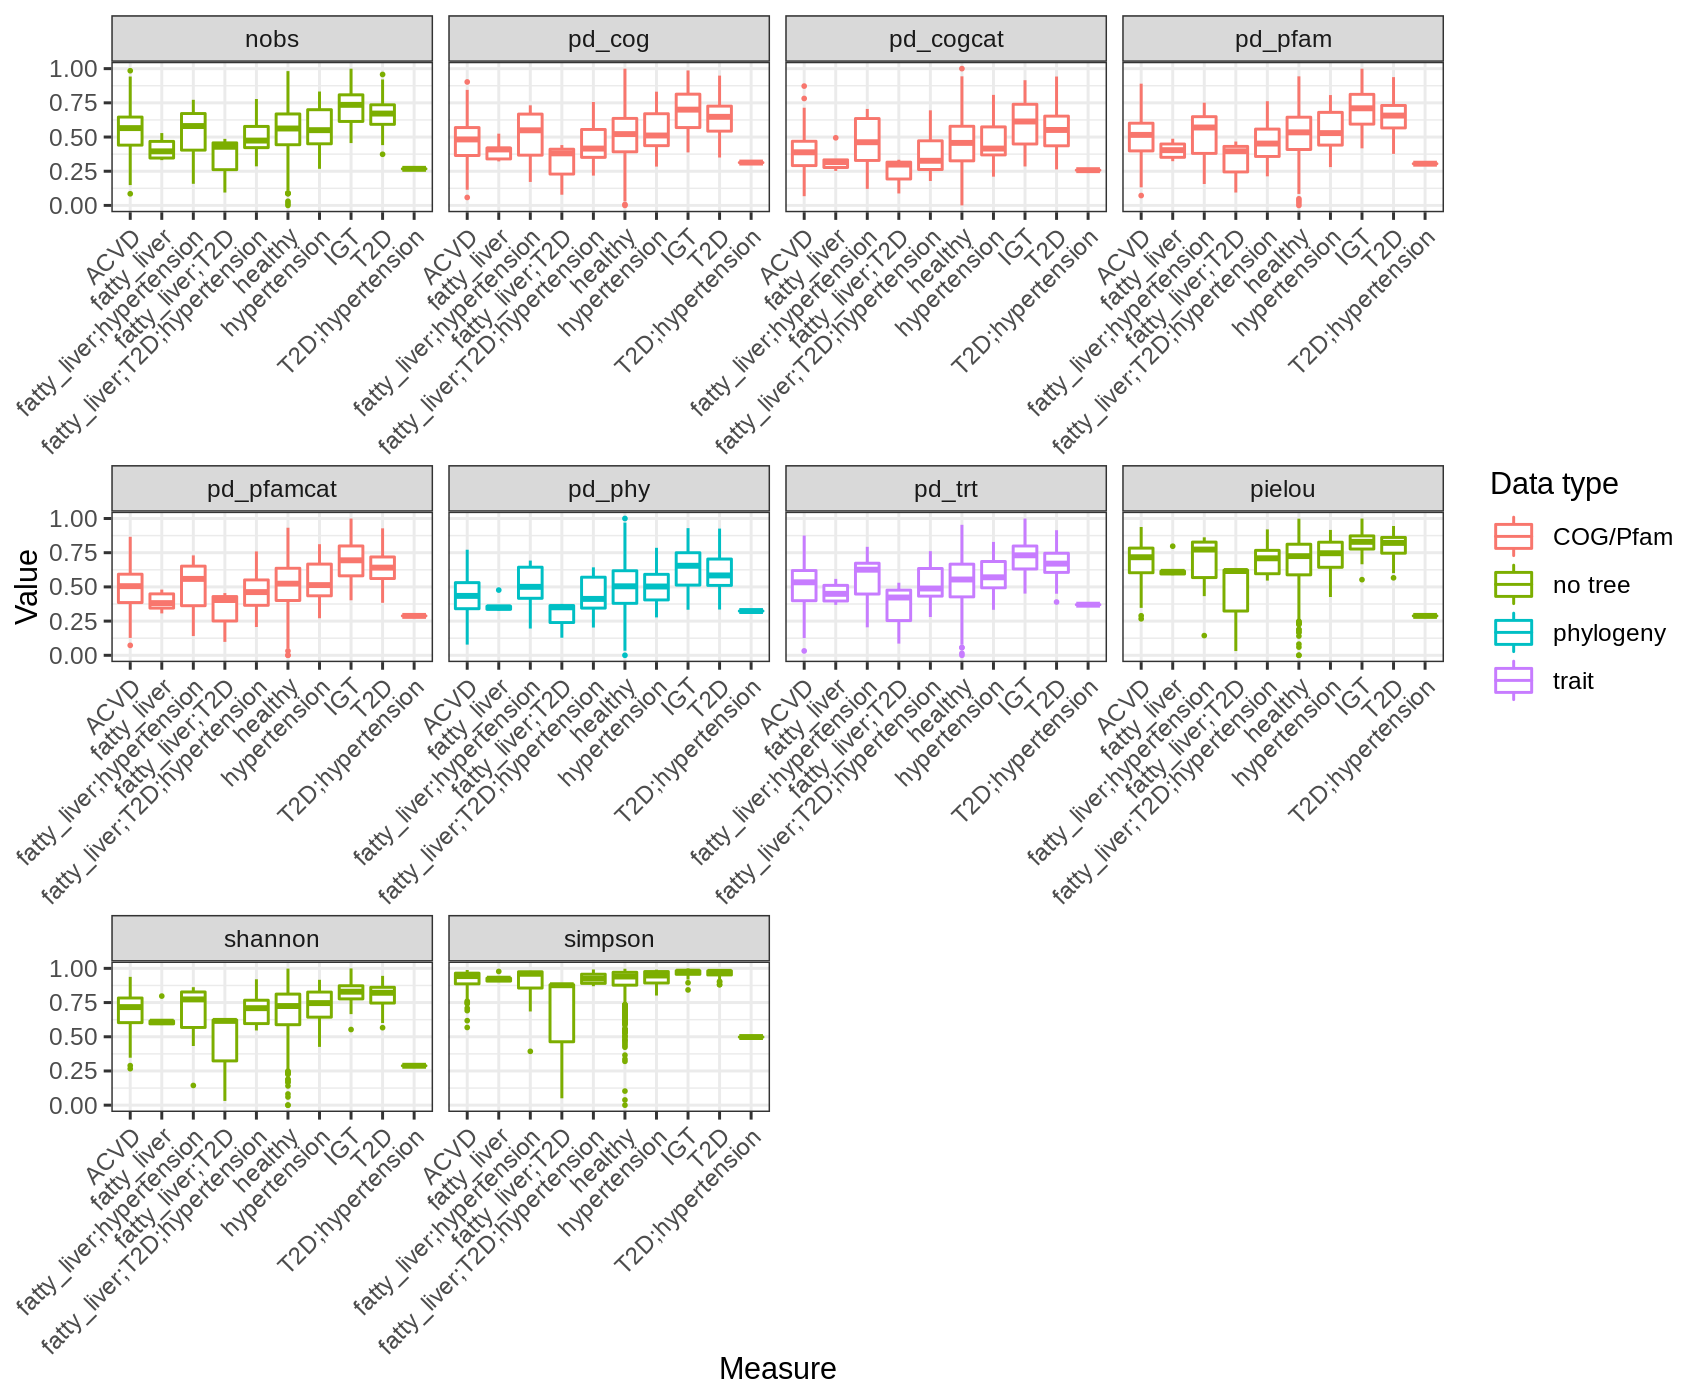

In [259]:
# plotting
p = alpha_all_j %>%
    filter.(disease != '') %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    mutate.(measure_type = case_when.(grepl('MPD|MNTD', metric) ~ 'eco-phy',
                                      grepl('FEve|FRic|FDis|RaoQ|FDiv', metric) ~ 'func. div.',
                                     TRUE ~ 'alpha div.')) %>%
    mutate.(data_type = case_when.(grepl('phy', metric) ~ 'phylogeny',
                                    grepl('trt', metric) ~ 'trait',
                                    grepl('pfam|cog', metric) ~ 'COG/Pfam',
                                    TRUE ~ 'no tree')) %>%
    filter.(measure_type == 'alpha div.') %>%
    ggplot(aes(disease, value, color=data_type)) +
    geom_boxplot(outlier.size = 0.3) +
    scale_color_discrete('Data type') +
    labs(x='Measure', y='Value') +
    facet_wrap(metric ~ ., scales='free_x', ncol=4) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(8.5,7)
plot(p)

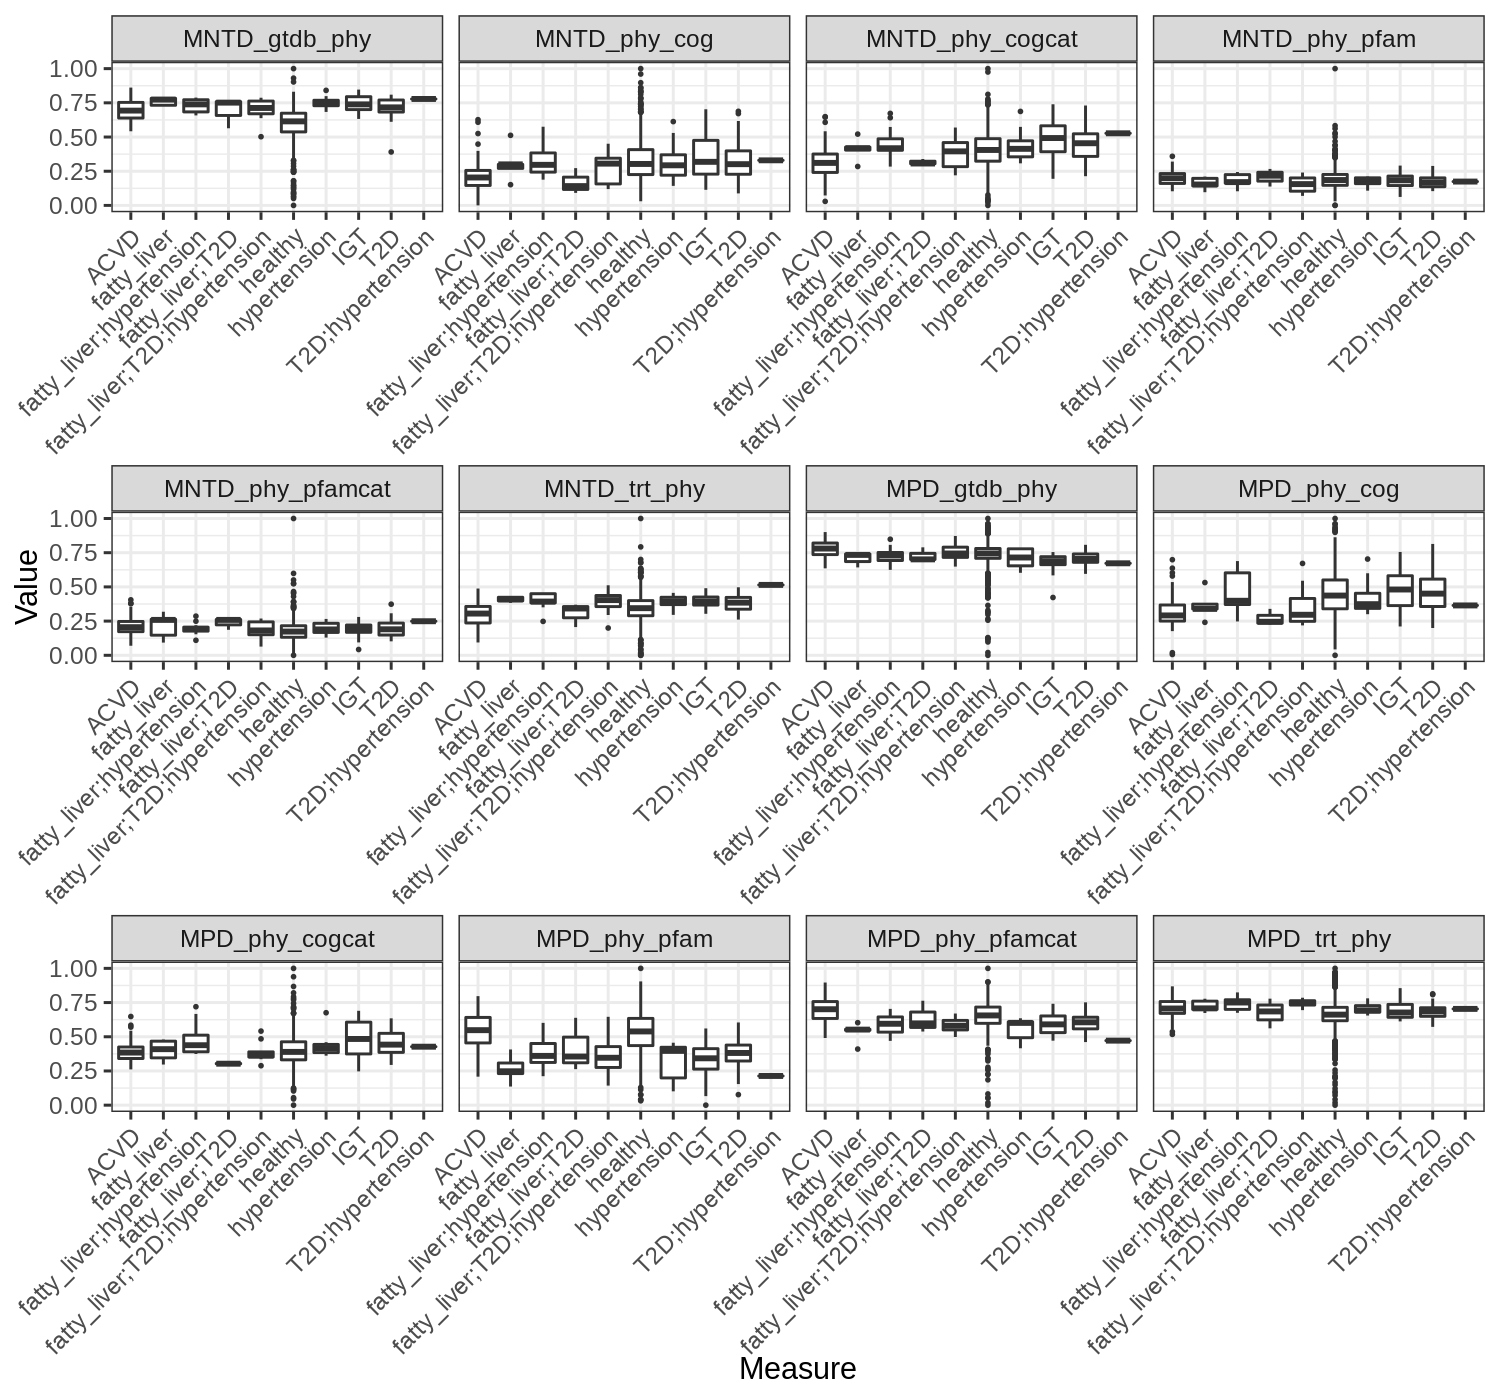

In [263]:
# plotting
p = alpha_all_j %>%
    filter.(disease != '') %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    mutate.(measure_type = case_when.(grepl('MPD|MNTD', metric) ~ 'eco-phy',
                                      grepl('FEve|FRic|FDis|RaoQ|FDiv', metric) ~ 'func. div.',
                                     TRUE ~ 'alpha div.')) %>%
    mutate.(data_type = case_when.(grepl('phy', metric) ~ 'phylogeny',
                                    grepl('trt', metric) ~ 'trait',
                                    grepl('pfam|cog', metric) ~ 'COG/Pfam',
                                    TRUE ~ 'no tree')) %>%
    filter.(measure_type == 'eco-phy') %>%
    ggplot(aes(disease, value)) +
    geom_boxplot(outlier.size = 0.3) +
    scale_color_discrete('Data type') +
    labs(x='Measure', y='Value') +
    facet_wrap(metric ~ ., scales='free_x', ncol=4) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(7.5,7)
plot(p)

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


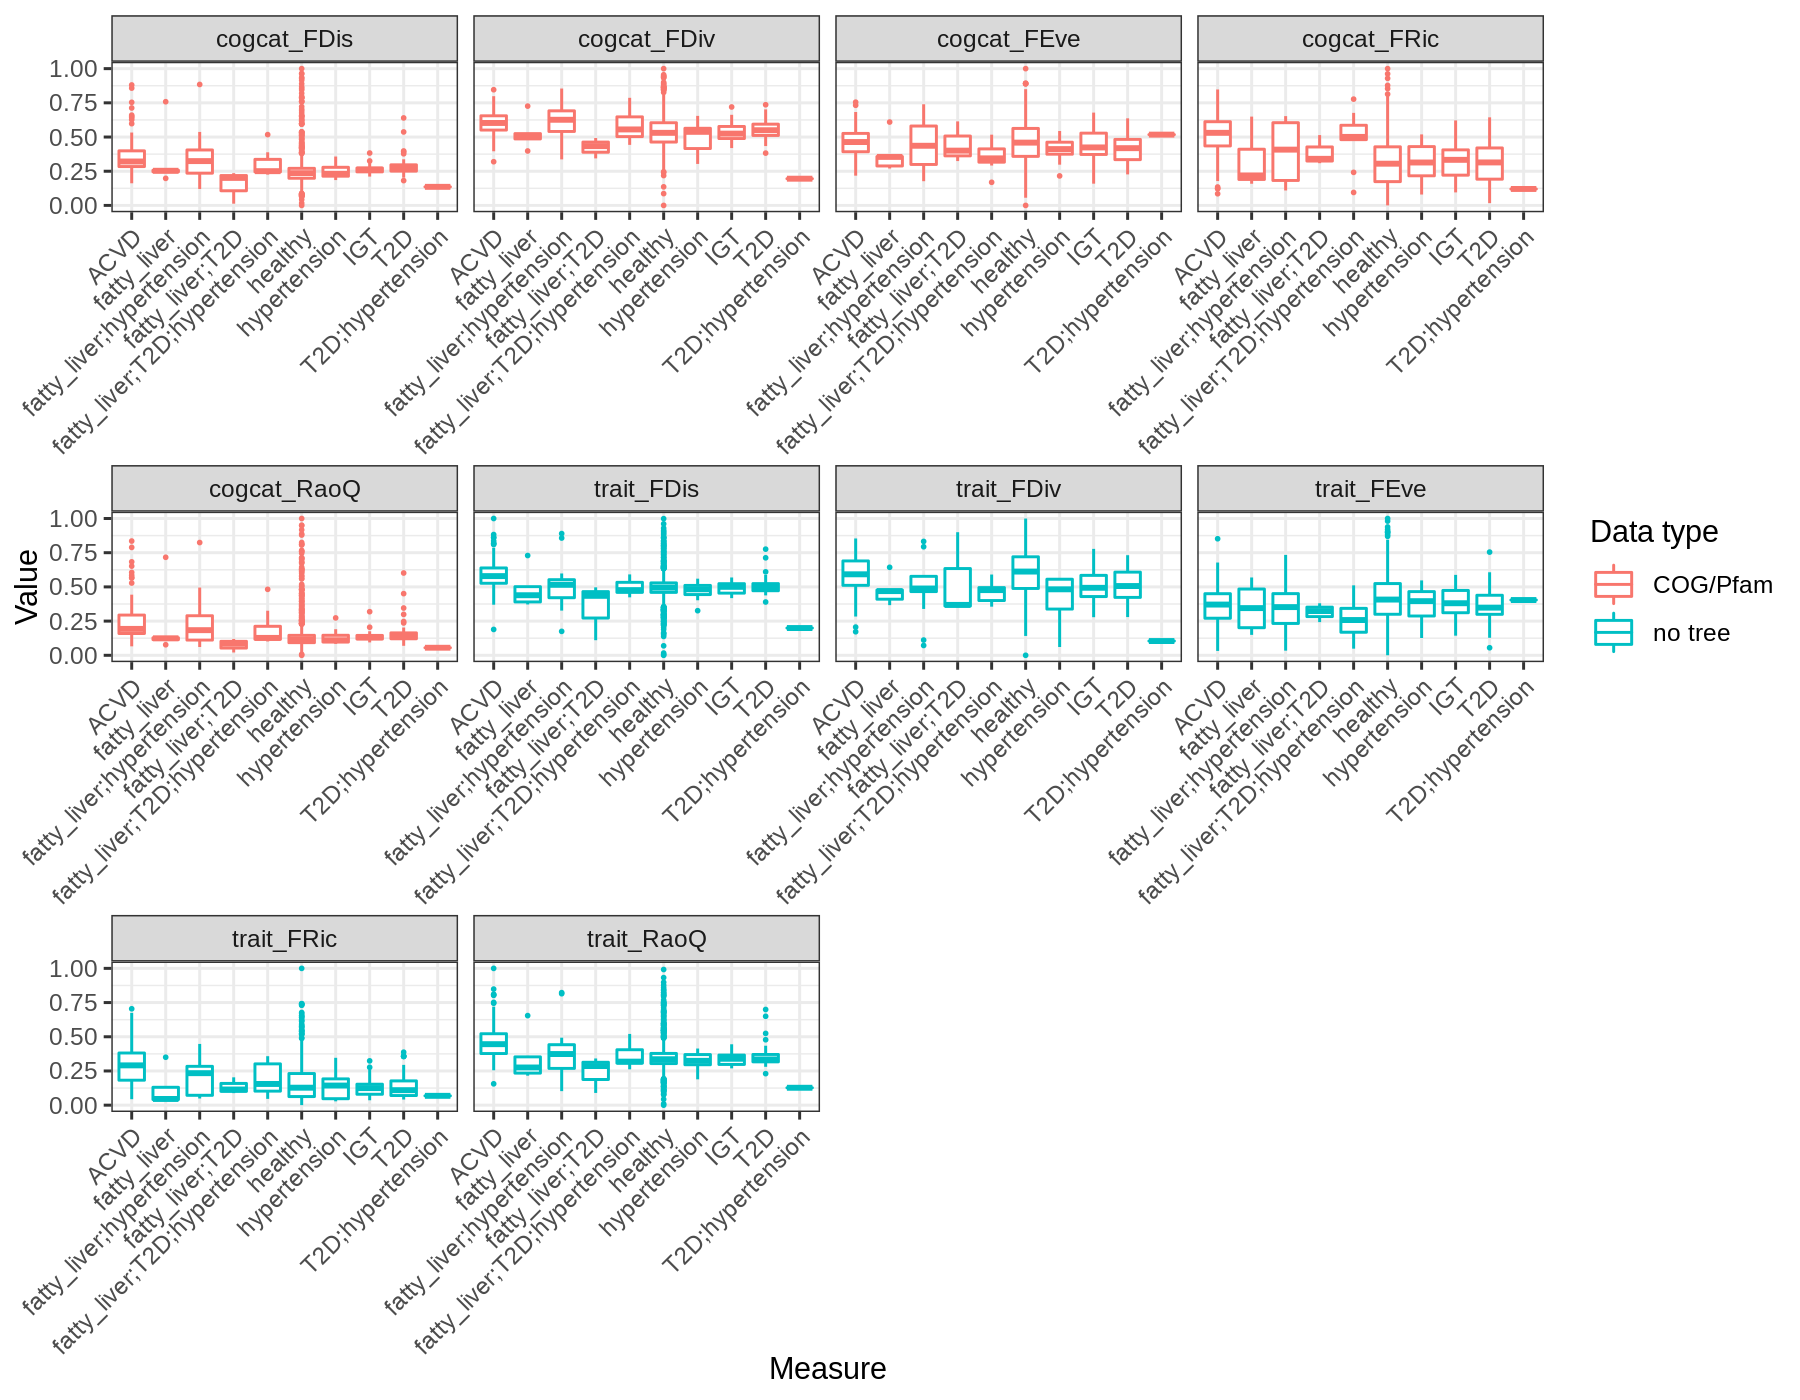

In [265]:
# plotting
p = alpha_all_j %>%
    filter.(disease != '') %>%
    mutate.(value = scales::rescale(value),
            .by=c(metric)) %>%
    mutate.(measure_type = case_when.(grepl('MPD|MNTD', metric) ~ 'eco-phy',
                                      grepl('FEve|FRic|FDis|RaoQ|FDiv', metric) ~ 'func. div.',
                                     TRUE ~ 'alpha div.')) %>%
    mutate.(data_type = case_when.(grepl('phy', metric) ~ 'phylogeny',
                                    grepl('trt', metric) ~ 'trait',
                                    grepl('pfam|cog', metric) ~ 'COG/Pfam',
                                    TRUE ~ 'no tree')) %>%
    filter.(measure_type == 'func. div.') %>%
    ggplot(aes(disease, value, color=data_type)) +
    geom_boxplot(outlier.size = 0.3) +
    scale_color_discrete('Data type') +
    labs(x='Measure', y='Value') +
    facet_wrap(metric ~ ., scales='free_x', ncol=4) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(9,7)
plot(p)

# sessionInfo

In [99]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/global_metagenome_diversity/envs/phyloseq/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] LeyLabRMisc_0.2.0 tidytable_0.6.5   data.table_1.14.0 ggplot2_3.3.5    
[5] tidyr_1.1.3       dplyr_1.0.7      

loaded via a namespace (and not attached):
 [1] pillar_1.6.2     compiler_4.1.1   base64enc_0.1-3  tools_4.1.1     
 [5] bit_4.0.4        digest_0.6.28    uuid_